In [2]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt
import statsmodels.api as sm

# Чтение данных из файла Excel
df = pd.read_excel('Данные чистый вариант.xlsx')
df.head()

,Unnamed: 0,LANDMASS,POPULATION,AVERAGE INCOME,SALARY,GDP,LIFE EXPECTANCY 55,HEALTHY LIFE EXPECTANCY,DEATHS,TRF,...,AIR POL 2020,AIR POL 2021,AIR POL 2022,WATER POL,CAR,LIFE EXPECTANCY,BIRTH RATE,DEATH RATE,MIGRATION,DUMP
0,Белгородская область,27.1,1514.5,41022,47638,1355,23.19,59.37,4220.7,1.169,...,168,156,158,59.0,336.3,73.03,710.0,1420.0,-730,207
1,Брянская область,34.9,1152.5,35722,40804,469,22.46,59.05,4509.4,1.196,...,47,44,54,52.0,213.6,71.22,710.0,1560.0,-200,9
2,Владимирская область,29.1,1325.5,32321,45677,737,22.18,55.99,4637.1,1.156,...,60,62,73,91.0,315.6,70.80,660.0,1680.0,-230,104
3,Воронежская область,52.2,2285.3,39319,46277,1255,23.01,54.87,4409.6,1.232,...,116,111,115,121.0,362.4,72.45,750.0,1530.0,30,54
4,Ивановская область,21.4,914.7,34275,36380,301,22.01,56.47,4789.2,1.367,...,25,25,25,58.0,347.2,70.57,750.0,1730.0,-40,14


In [3]:
for column in df.columns[1:]:
    df[column] = pd.to_numeric(df[column], errors='coerce')  # Переводим значения в float, игнорируя некорректные значения

In [4]:
df['DEATHS CHILDREN'] = df['DEATHS CHILDREN'] * 100
df['CAR'] = df['CAR'] * 100
df = df.rename(columns={'DEATHS': 'DEATHS OLD'})

In [5]:
df.describe()

,LANDMASS,POPULATION,AVERAGE INCOME,SALARY,GDP,LIFE EXPECTANCY 55,HEALTHY LIFE EXPECTANCY,DEATHS OLD,TRF,HEALTHY PERCENTAGE,...,AIR POL 2020,AIR POL 2021,AIR POL 2022,WATER POL,CAR,LIFE EXPECTANCY,BIRTH RATE,DEATH RATE,MIGRATION,DUMP
count,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,...,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000,85.000000
mean,201.475294,1722.910588,41251.858824,56082.800000,1425.682353,22.782000,57.510235,4127.351765,1.449235,7.861176,...,199.470588,202.423529,202.082353,133.258824,32730.823529,71.779412,903.176471,1333.764706,-146.364706,147.164706
std,438.246340,1894.271755,19054.611967,23221.116626,2928.409028,1.294952,4.632116,576.265442,0.282587,5.637145,...,360.293088,356.436309,371.320944,183.160398,7482.209409,2.358243,238.927224,306.594103,482.649948,182.586890
min,0.900000,41.400000,20781.000000,32801.000000,71.000000,20.290000,36.150000,2123.200000,0.871000,0.900000,...,2.000000,2.000000,2.000000,0.000000,11730.000000,66.200000,600.000000,340.000000,-1020.000000,0.000000
25%,30.000000,680.700000,31309.000000,41527.000000,338.000000,21.850000,56.140000,3940.300000,1.289000,4.100000,...,37.000000,39.000000,35.000000,31.000000,28230.000000,70.350000,760.000000,1190.000000,-430.000000,31.000000
50%,71.500000,1128.700000,35164.000000,47638.000000,684.000000,22.790000,58.240000,4278.800000,1.427000,6.100000,...,97.000000,97.000000,104.000000,73.000000,32900.000000,71.560000,870.000000,1380.000000,-200.000000,81.000000
75%,164.700000,2130.900000,43220.000000,59413.000000,1394.000000,23.370000,59.660000,4470.800000,1.544000,9.600000,...,175.000000,178.000000,195.000000,135.000000,37030.000000,73.030000,950.000000,1530.000000,-10.000000,205.000000
max,3083.500000,13104.200000,116639.000000,140602.000000,24471.000000,27.490000,65.450000,4925.600000,2.744000,28.600000,...,2540.000000,2418.000000,2632.000000,933.000000,57620.000000,78.340000,2080.000000,1830.000000,2370.000000,901.000000


In [6]:
df.head()

,Unnamed: 0,LANDMASS,POPULATION,AVERAGE INCOME,SALARY,GDP,LIFE EXPECTANCY 55,HEALTHY LIFE EXPECTANCY,DEATHS OLD,TRF,...,AIR POL 2020,AIR POL 2021,AIR POL 2022,WATER POL,CAR,LIFE EXPECTANCY,BIRTH RATE,DEATH RATE,MIGRATION,DUMP
0,Белгородская область,27.1,1514.5,41022,47638,1355,23.19,59.37,4220.7,1.169,...,168,156,158,59.0,33630.0,73.03,710.0,1420.0,-730,207
1,Брянская область,34.9,1152.5,35722,40804,469,22.46,59.05,4509.4,1.196,...,47,44,54,52.0,21360.0,71.22,710.0,1560.0,-200,9
2,Владимирская область,29.1,1325.5,32321,45677,737,22.18,55.99,4637.1,1.156,...,60,62,73,91.0,31560.0,70.80,660.0,1680.0,-230,104
3,Воронежская область,52.2,2285.3,39319,46277,1255,23.01,54.87,4409.6,1.232,...,116,111,115,121.0,36240.0,72.45,750.0,1530.0,30,54
4,Ивановская область,21.4,914.7,34275,36380,301,22.01,56.47,4789.2,1.367,...,25,25,25,58.0,34720.0,70.57,750.0,1730.0,-40,14


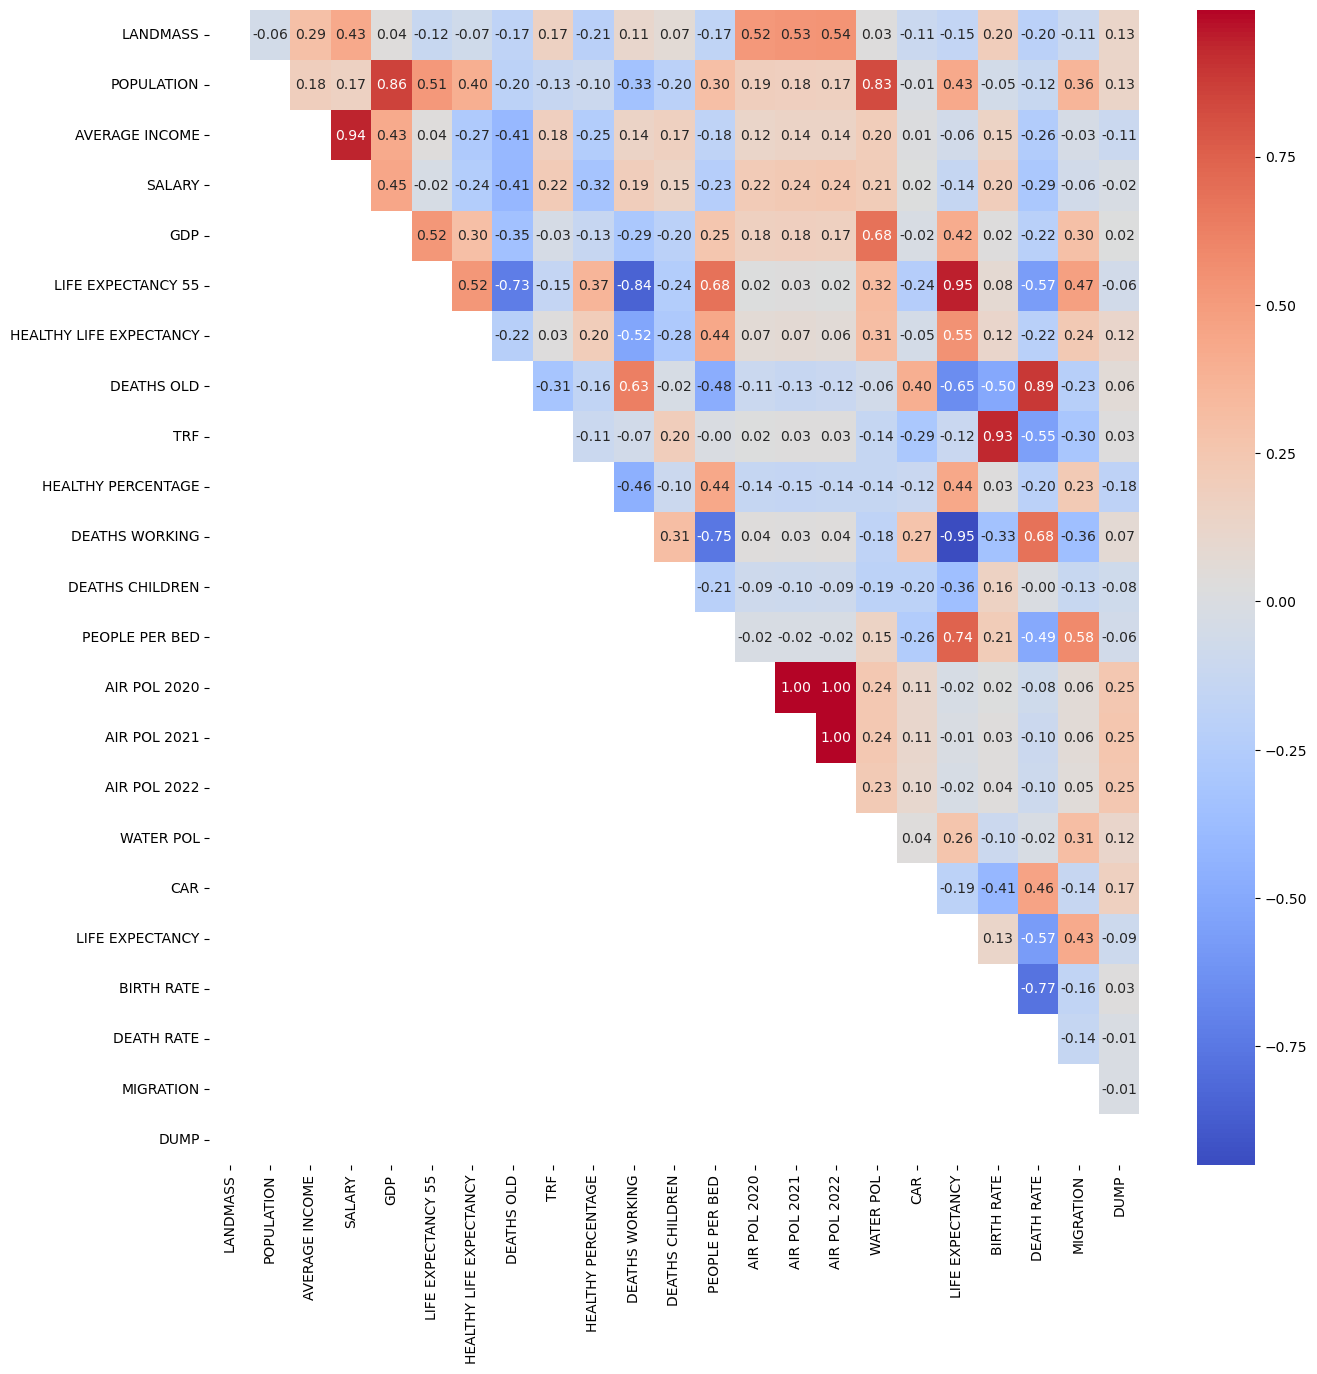

In [7]:
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

Описание переменных:
    LANDMASS - Площадь территории, тыс. кв. км
    POPULATION - Численность населения, тыс. чел
    AVERAGE INCOME - Среднедушевые доходы, руб в месяц
    SALARY	- Среднемесячная номинальная зар плата, руб в мес
    GDP	- ВРП, млн руб
    LIFE EXPECTANCY 55	- Ожидаемая продолжительность жизни в возрасте 55 лет, лет
    HEALTHY LIFE EXPECTANCY	- Ожидаемая продолжительность здоровой жизни
    DEATHS OLD	- Смертность старше трудоспособного возраста, человек на 100 000
    TRF	- Суммарный коэффициент рождаемости, на 1 женщину
    HEALTHY PERCENTAGE	- Граждан, ведущих здоровый образ жизни, %
    DEATHS WORKING	- Смертность населения трудоспособного возрасста, на 100 000 человек
    DEATHS BLOOD	- Смертность от болезней системы кровообращения, на 100 000 человек
    DEATHS CANCER	- Смертность от новообразований, на 100 000 человек
    DEATHS CHILDREN	- Младенческая смертность в возрасте до 1 года, на 1000 родившихся
    PEOPLE PER BED - Человек на одну больничную койку
    AIR POL 2020 -	ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ,  ОТХОДЯЩИХ ОТ СТАЦИОНАРНЫХ ИСТОЧНИКОВ, тыс тонн в 2020 году
    AIR POL 2021 - ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ,  ОТХОДЯЩИХ ОТ СТАЦИОНАРНЫХ ИСТОЧНИКОВ, тыс тонн в 2021 году
    AIR POL 2022 - ВЫБРОСЫ ЗАГРЯЗНЯЮЩИХ ВЕЩЕСТВ В АТМОСФЕРНЫЙ ВОЗДУХ,  ОТХОДЯЩИХ ОТ СТАЦИОНАРНЫХ ИСТОЧНИКОВ, тыс тонн в 2022 году
    WATER POL - СБРОС ЗАГРЯЗНЕННЫХ СТОЧНЫХ ВОД В ПОВЕРХНОСТНЫЕ ВОДНЫЕ ОБЪЕКТЫ, миллионов кубических метров)
    CAR - Число собственных автомобилей, на 100 000 человек
    LIFE EXPECTANCY	-  ОЖИДАЕМАЯ ПРОДОЛЖИТЕЛЬНОСТЬ ЖИЗНИ ПРИ РОЖДЕНИИ, лет
    BIRTH RATE	- ОБЩИЕ КОЭФФИЦИЕНТЫ РОЖДАЕМОСТИ, на 100 000 человек
    DEATH RATE	- ОБЩИЕ КОЭФФИЦИЕНТЫ СМЕРТНОСТИ, на 100 000 человек
    MIGRATION - КОЭФФИЦИЕНТЫ МИГРАЦИОННОГО ПРИРОСТА на 100 000 человек населения

Наглядно видно, что показатели загрязнения воздуха за все три года практически идентичны и кореллируют с показателем 0,99 друг с другом. При этом корелляция с другими параметрами у них не различается значительно.
Загрязнение воздуха сильно кореллирует с площадью региона. Это вызвано тем, что показатель в абсолютных значениях, поэтому в крупном регионе физически больше возможностей к выбросам. Аналогично, корелляция в 0,83 наблюдается между загрязнением воды и населением. Опять-таки из-за того, что в густонаселённых регионах больше ВРП (корелляция 0,86), а больший размер экономики подразумевает при прочих равных больший показатель абсолютных выбросов. Опираясь на практику других работ и тенденцию абсолютных значений быть зависимыми в первую очередь от ВРП и населения региона, показатели были поделены на ВРП для получения показателей выбросов на млн руб ВРП для отражения фактически того, насколько вредно производство в среднем.
Показатель средней заработной платы и дохода кореллируют с показателей 0,94, при этом их кореляция с другими параметрами полностью идентична. В связи с этим параметр заработной платы было решено исключить за ненадобностью.

In [8]:
df['DENSITY'] = df['POPULATION'] / df['LANDMASS']
df['AIR POL 2020'] = df['AIR POL 2020'] / df['GDP']
df['AIR POL 2021'] = df['AIR POL 2021'] / df['GDP']
df['AIR POL 2022'] = df['AIR POL 2022'] / df['GDP']
df['WATER POL'] = df['WATER POL'] / df['GDP']
df['DUMP'] = df['DUMP'] / df['GDP']

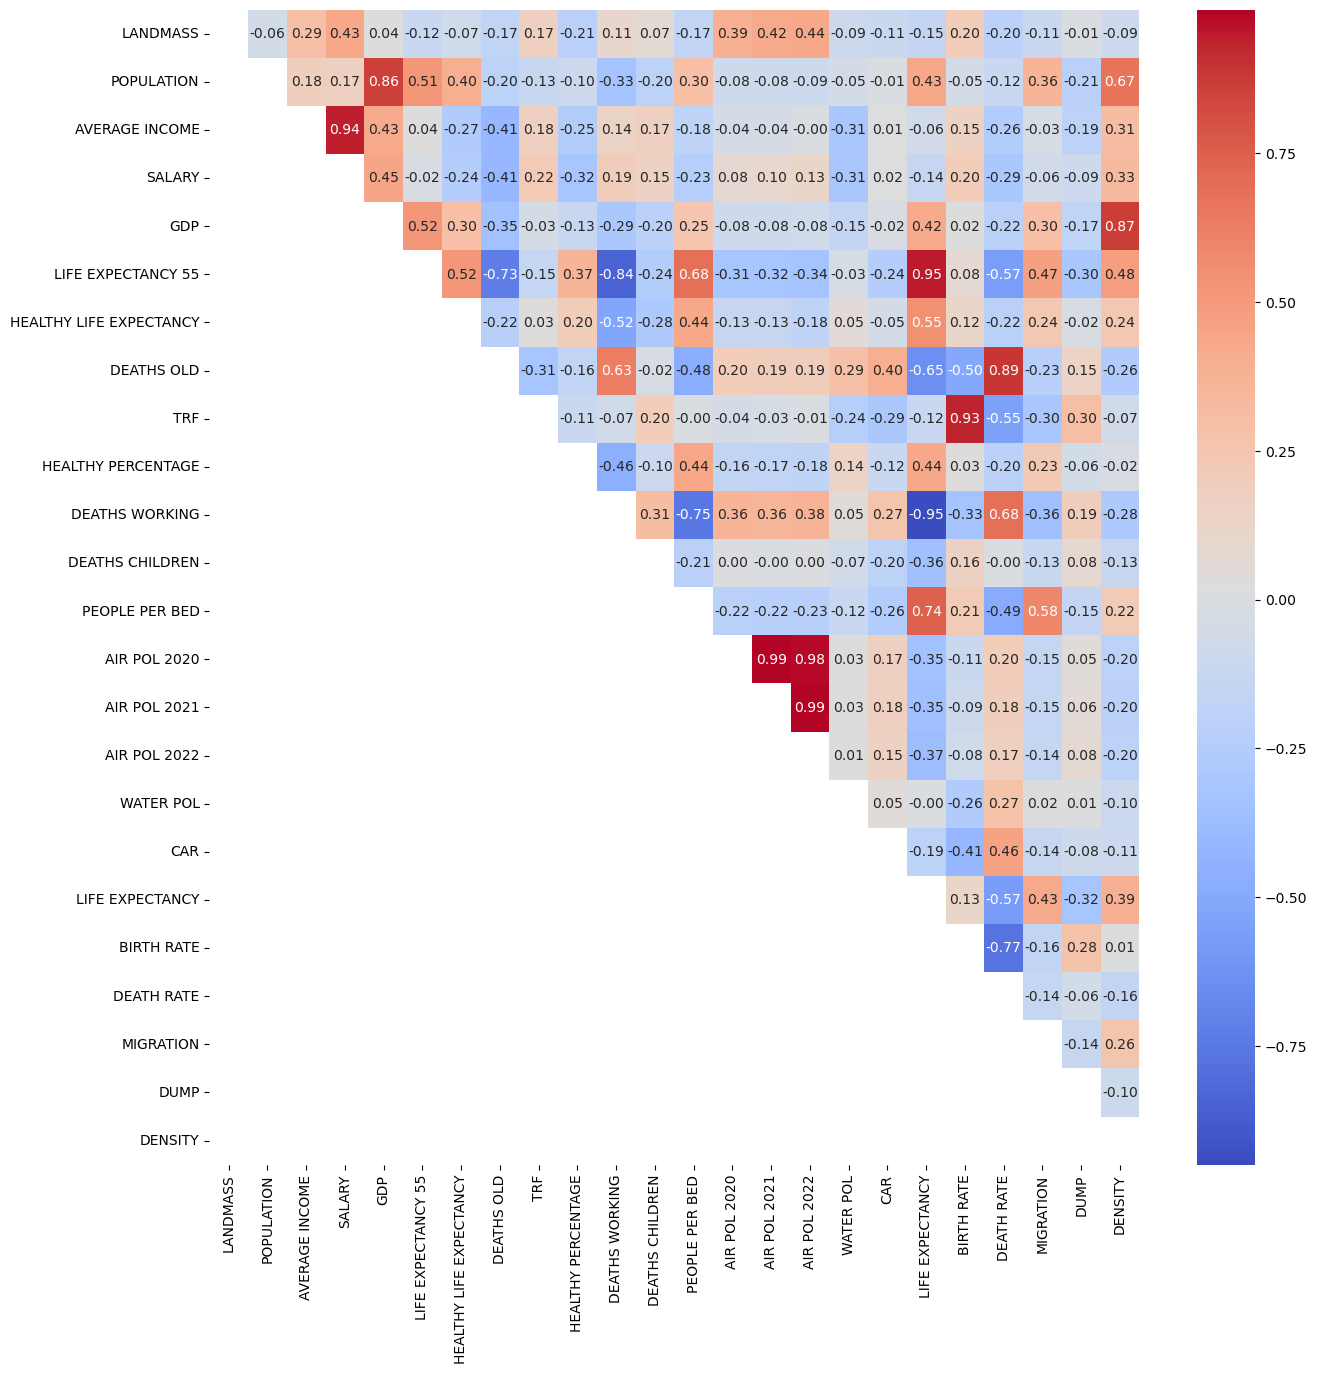

In [9]:
import seaborn as sns
import numpy as np
fig, ax = plt.subplots(figsize=(15, 15))
corr = df.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

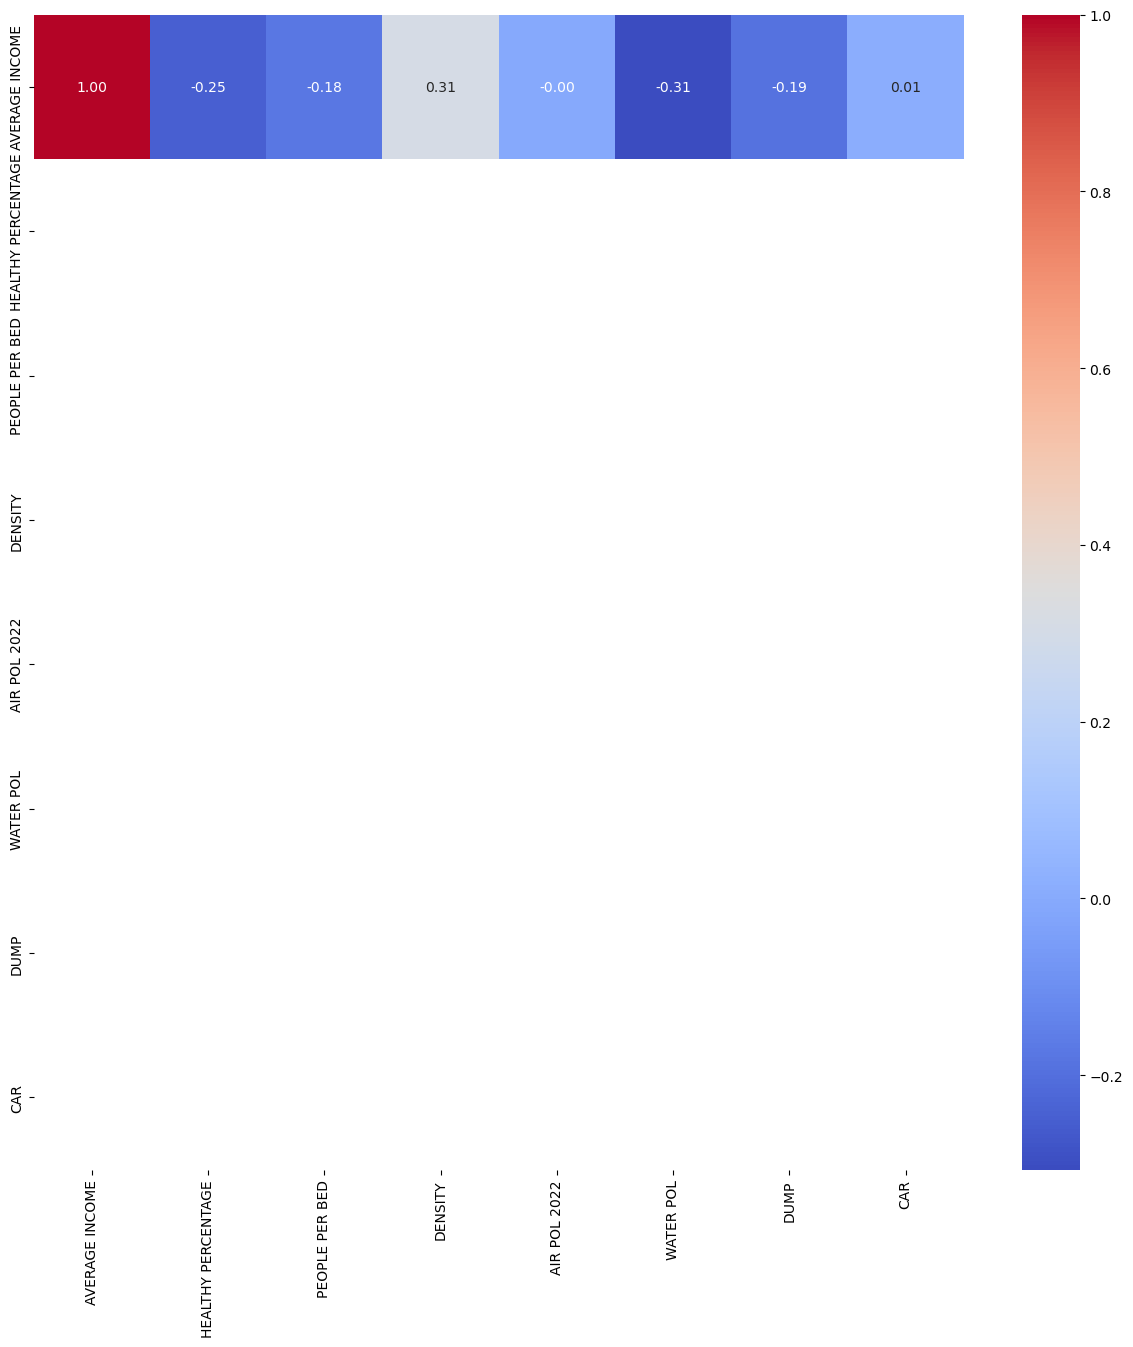

In [10]:
df100 = df[['AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY', 'AIR POL 2022', 'WATER POL','DUMP', 'CAR']]
corr = df100.corr()
mask = np.zeros_like(corr, dtype=bool)
mask[1:, :] = True
fig, ax = plt.subplots(figsize=(15, 15))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [11]:
df1 = df[['LIFE EXPECTANCY','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
df1.head()

,LIFE EXPECTANCY,AIR POL 2020,AIR POL 2021,AIR POL 2022,WATER POL,DUMP,CAR,AVERAGE INCOME,HEALTHY PERCENTAGE,PEOPLE PER BED,DENSITY
0,73.03,0.123985,0.115129,0.116605,0.043542,0.152768,33630.0,41022,20.0,144.0,55.885609
1,71.22,0.100213,0.093817,0.115139,0.110874,0.019190,21360.0,35722,9.6,134.4,33.022923
2,70.80,0.081411,0.084125,0.099050,0.123474,0.141113,31560.0,32321,2.9,119.4,45.549828
3,72.45,0.092430,0.088446,0.091633,0.096414,0.043028,36240.0,39319,4.3,127.7,43.779693
4,70.57,0.083056,0.083056,0.083056,0.192691,0.046512,34720.0,34275,0.9,112.7,42.742991


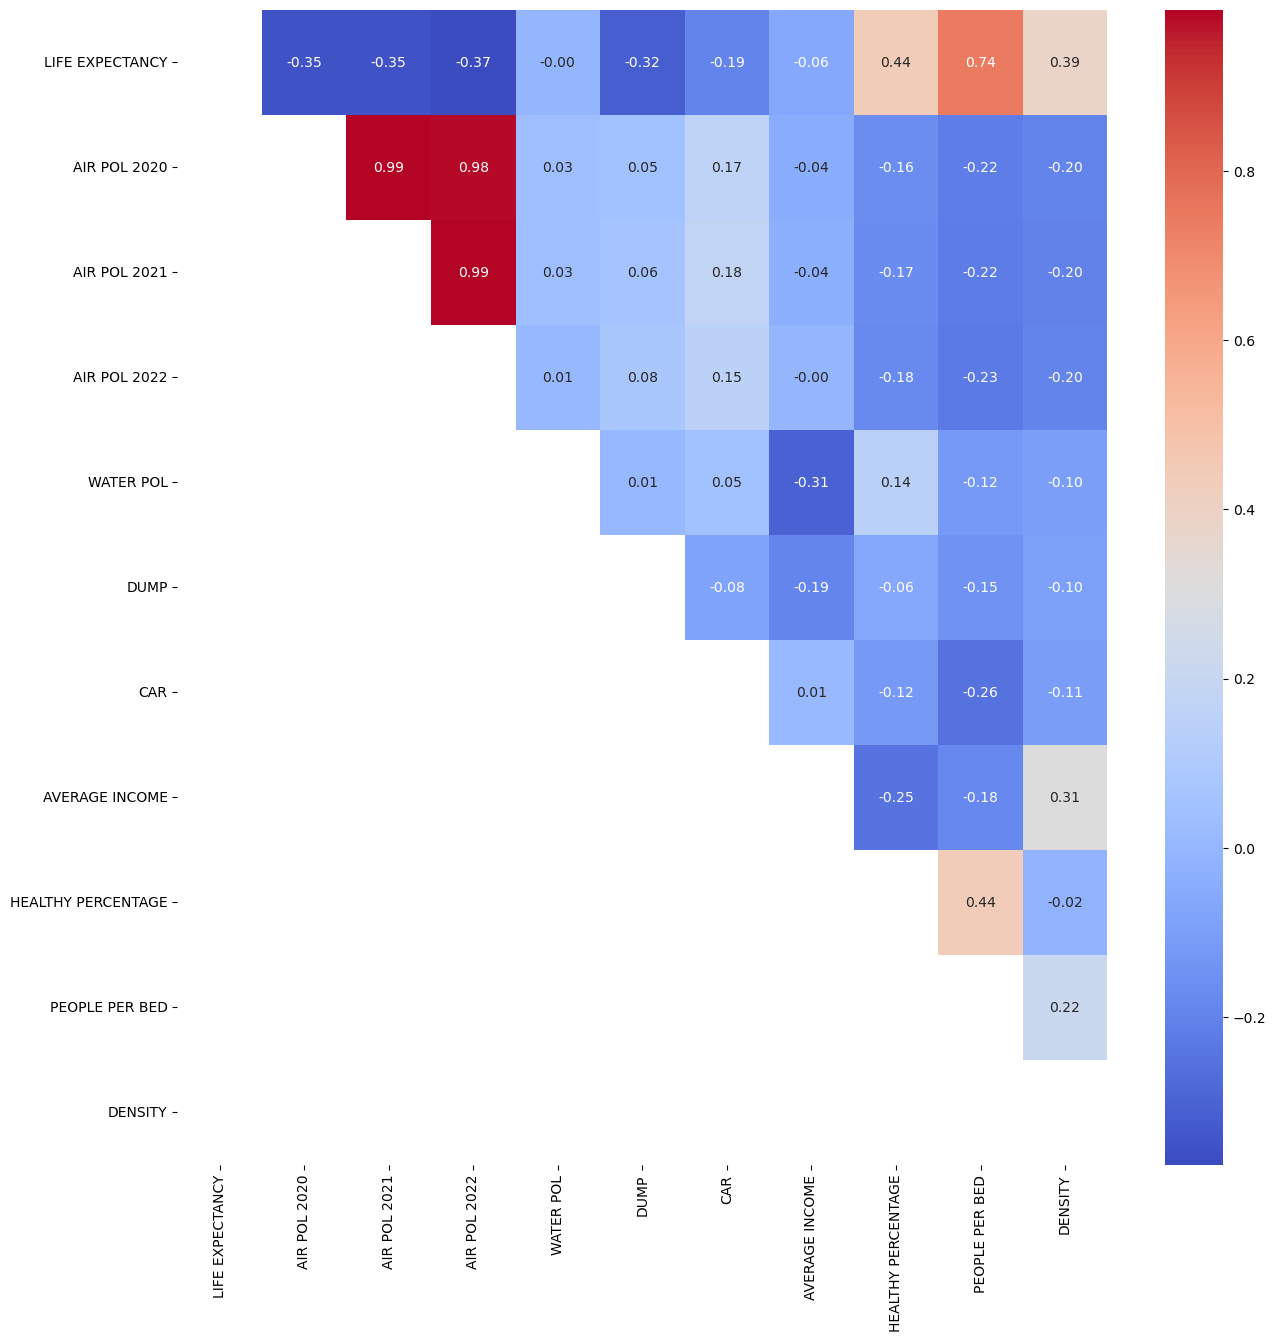

In [12]:
fig, ax = plt.subplots(figsize=(15, 15))
corr = df1.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [13]:
#define response variable
y = df1['LIFE EXPECTANCY']

#define explanatory variable
x = df1[['AIR POL 2022']]

#add constant to predictor variables
x = sm.add_constant (x)

#fit linear regression model
model = sm. OLS (y, x). fit ()

#view model summary
model. summary ()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     13.56
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           0.000409
Time:                        22:41:48   Log-Likelihood:                -186.60
No. Observations:                  85   AIC:                             377.2
Df Residuals:                      83   BIC:                             382.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.7847      0.363    200.779      0.000      72.064      73.506
AIR POL 2022    -6.1420      1.668     -3.683      0.000      -9.459      -2.825
==============================================================================
Omnibus:                        1.775   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.152
Skew:                           0.185   Prob(JB):                        0.562
Kurtosis:                       3.434   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

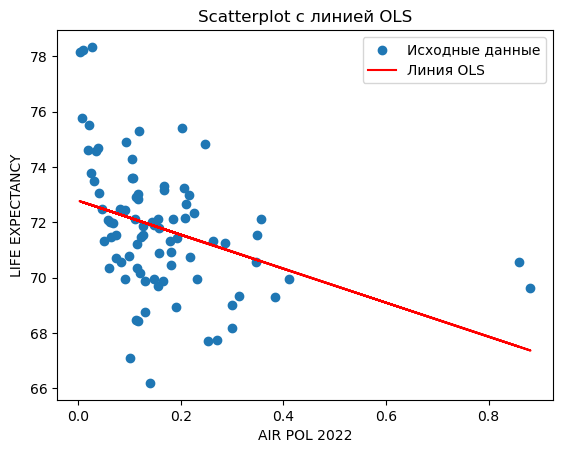

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.140
Model:                            OLS   Adj. R-squared:                  0.130
Method:                 Least Squares   F-statistic:                     13.56
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           0.000409
Time:                        22:41:49   Log-Likelihood:                -186.60
No. Observations:                  85   AIC:                             377.2
Df Residuals:                      83   BIC:                             382.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           72.7847      0.363    200.779      0.000      72.064      73.506
AIR POL 2022    -6.1420      1.668     -3.683      0.000      -9.459      -2.825
==============================================================================
Omnibus:                        1.775   Durbin-Watson:                   1.072
Prob(Omnibus):                  0.412   Jarque-Bera (JB):                1.152
Skew:                           0.185   Prob(JB):                        0.562
Kurtosis:                       3.434   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [14]:
x = sm.add_constant(df1['AIR POL 2022'])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df['AIR POL 2022'], df['LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df['AIR POL 2022'], predicted_y, color='red', label='Линия OLS')
plt.xlabel('AIR POL 2022')
plt.ylabel('LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

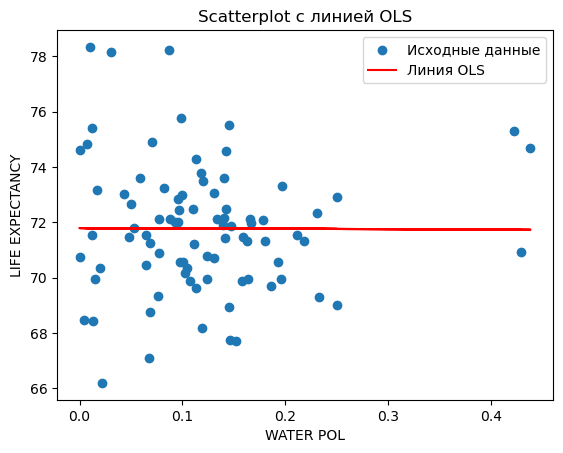

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.001857
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.966
Time:                        22:41:49   Log-Likelihood:                -193.03
No. Observations:                  85   AIC:                             390.1
Df Residuals:                      83   BIC:                             394.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         71.7950      0.445    161.432      0.000      70.910      72.680
WATER POL     -0.1300      3.018     -0.043      0.966      -6.133       5.873
==============================================================================
Omnibus:                        4.995   Durbin-Watson:                   0.909
Prob(Omnibus):                  0.082   Jarque-Bera (JB):                4.274
Skew:                           0.452   Prob(JB):                        0.118
Kurtosis:                       3.625   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [15]:
x = sm.add_constant(df1['WATER POL'])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df['WATER POL'], df['LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df['WATER POL'], predicted_y, color='red', label='Линия OLS')
plt.xlabel('WATER POL')
plt.ylabel('LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

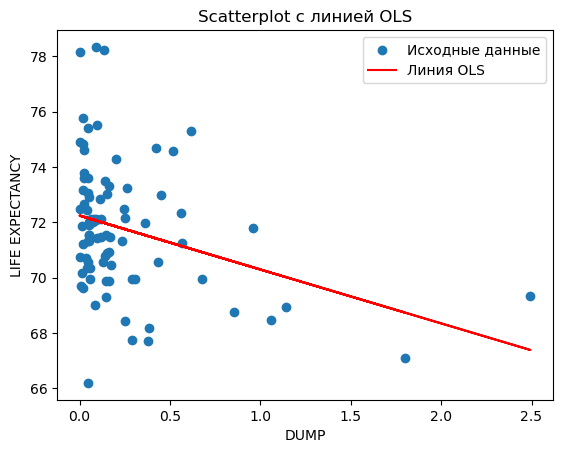

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.101
Model:                            OLS   Adj. R-squared:                  0.090
Method:                 Least Squares   F-statistic:                     9.358
Date:                Mon, 03 Jun 2024   Prob (F-statistic):            0.00299
Time:                        22:41:49   Log-Likelihood:                -188.49
No. Observations:                  85   AIC:                             381.0
Df Residuals:                      83   BIC:                             385.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         72.2441      0.287    251.393      0.000      71.673      72.816
DUMP          -1.9467      0.636     -3.059      0.003      -3.212      -0.681
==============================================================================
Omnibus:                        6.713   Durbin-Watson:                   0.834
Prob(Omnibus):                  0.035   Jarque-Bera (JB):                6.220
Skew:                           0.532   Prob(JB):                       0.0446
Kurtosis:                       3.790   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [16]:
x = sm.add_constant(df1['DUMP'])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df['DUMP'], df['LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df['DUMP'], predicted_y, color='red', label='Линия OLS')
plt.xlabel('DUMP')
plt.ylabel('LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

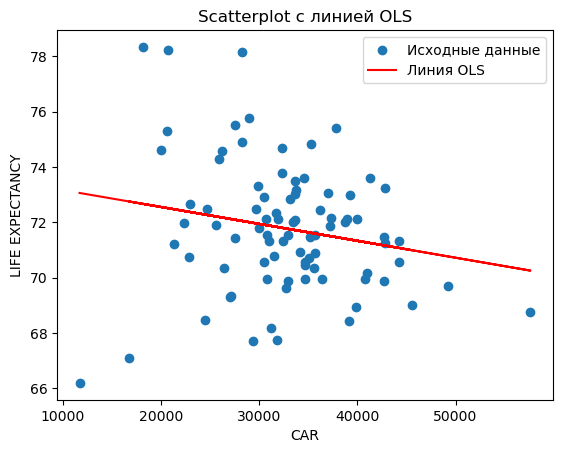

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.246
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0752
Time:                        22:41:49   Log-Likelihood:                -191.40
No. Observations:                  85   AIC:                             386.8
Df Residuals:                      83   BIC:                             391.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         73.7806      1.139     64.768      0.000      71.515      76.046
CAR        -6.114e-05   3.39e-05     -1.802      0.075      -0.000    6.36e-06
==============================================================================
Omnibus:                        2.790   Durbin-Watson:                   0.947
Prob(Omnibus):                  0.248   Jarque-Bera (JB):                2.593
Skew:                           0.034   Prob(JB):                        0.273
Kurtosis:                       3.853   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [17]:
x = sm.add_constant(df1['CAR'])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df['CAR'], df['LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df['CAR'], predicted_y, color='red', label='Линия OLS')
plt.xlabel('CAR')
plt.ylabel('LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

In [18]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['LIFE EXPECTANCY']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        LIFE EXPECTANCY   R-squared:                       0.694
Model:                            OLS   Adj. R-squared:                  0.662
Method:                 Least Squares   F-statistic:                     21.56
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.05e-16
Time:                        22:41:49   Log-Likelihood:                -142.69
No. Observations:                  85   AIC:                             303.4
Df Residuals:                      76   BIC:                             325.4
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 64.7914      1.525     42.477      0.000      61.753      67.829
AIR POL 2022          -2.6473      1.093     -2.421      0.018      -4.825      -0.470
WATER POL              1.8332      1.903      0.963      0.338      -1.957       5.624
DUMP                  -1.1859      0.409     -2.901      0.005      -2.000      -0.372
CAR                -5.317e-07    2.1e-05     -0.025      0.980   -4.24e-05    4.13e-05
AVERAGE INCOME     -2.015e-06    9.4e-06     -0.214      0.831   -2.07e-05    1.67e-05
HEALTHY PERCENTAGE     0.0565      0.031      1.835      0.070      -0.005       0.118
PEOPLE PER BED         0.0566      0.008      7.160      0.000       0.041       0.072
DENSITY                0.0008      0.000      3.199      0.002       0.000       0.001
==============================================================================
Omnibus:                       11.727   Durbin-Watson:                   1.700
Prob(Omnibus):                  0.003   Jarque-Bera (JB):               12.234
Skew:                           0.808   Prob(JB):                      0.00220
Kurtosis:                       3.919   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [19]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 13.153149609881845),
 ('p-value', 0.10668772862956911),
 ('f-value', 1.739184398695143),
 ('f p-value', 0.1029341487978954)]

In [20]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

             Variable         VIF
0               const  105.176905
1        AIR POL 2022    1.105771
2           WATER POL    1.190326
3                DUMP    1.110076
4                 CAR    1.102966
5      AVERAGE INCOME    1.433176
6  HEALTHY PERCENTAGE    1.343890
7      PEOPLE PER BED    1.583740
8             DENSITY    1.251883


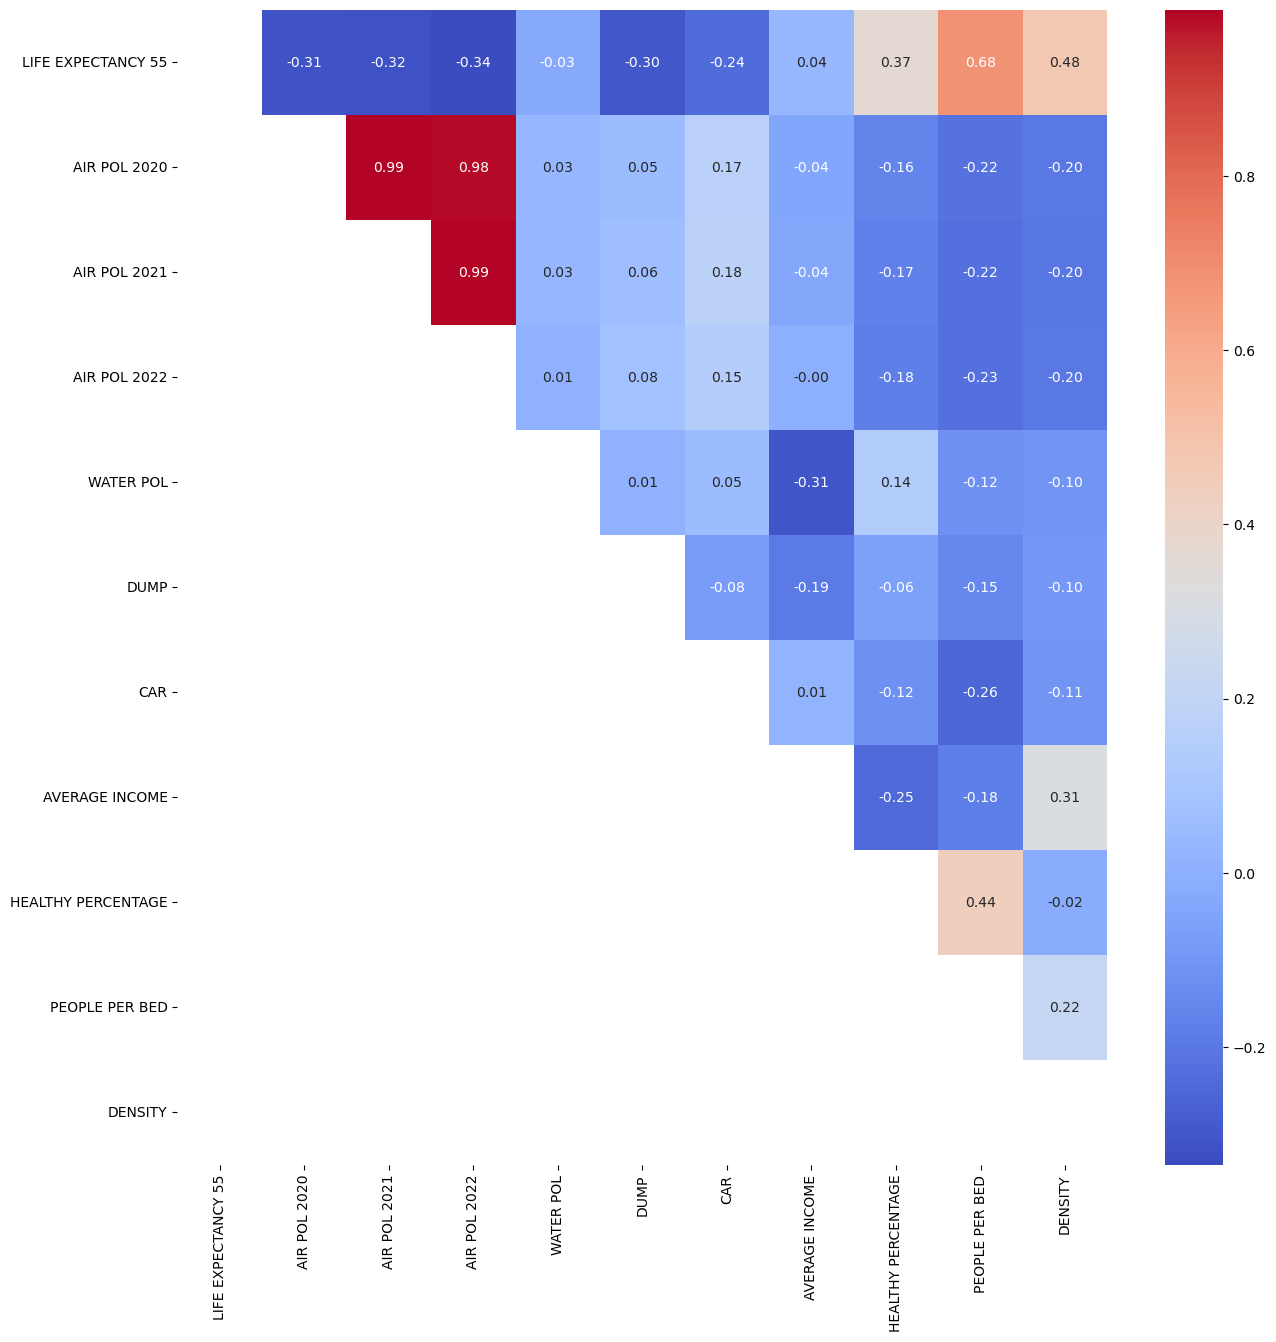

In [21]:
df2 = df[['LIFE EXPECTANCY 55','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df2.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

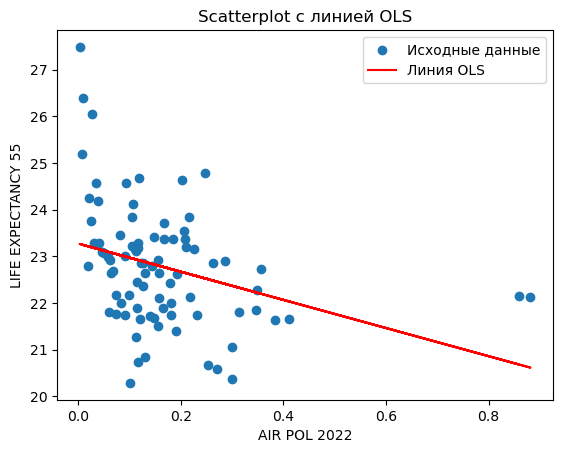

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LIFE EXPECTANCY 55   R-squared:                       0.112
Model:                            OLS   Adj. R-squared:                  0.102
Method:                 Least Squares   F-statistic:                     10.50
Date:                Mon, 03 Jun 2024   Prob (F-statistic):            0.00172
Time:                        22:41:50   Log-Likelihood:                -137.01
No. Observations:                  85   AIC:                             278.0
Df Residuals:                      83   BIC:                             282.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           23.2756      0.202    115.057      0.000      22.873      23.678
AIR POL 2022    -3.0157      0.931     -3.241      0.002      -4.867      -1.165
==============================================================================
Omnibus:                        9.336   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.009   Jarque-Bera (JB):                9.642
Skew:                           0.637   Prob(JB):                      0.00806
Kurtosis:                       4.048   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [22]:
name = 'AIR POL 2022'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY 55'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df['LIFE EXPECTANCY 55'], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel('LIFE EXPECTANCY 55')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

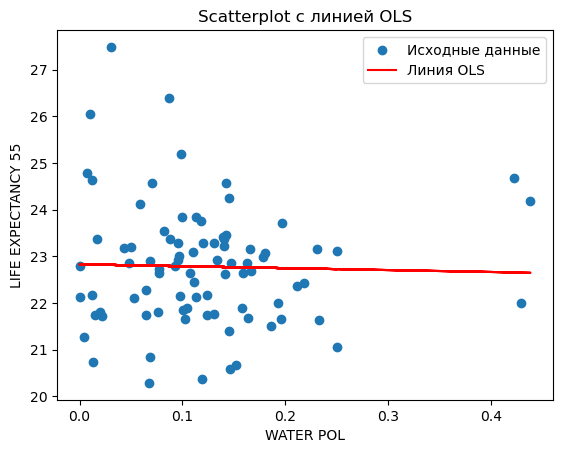

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LIFE EXPECTANCY 55   R-squared:                       0.001
Model:                            OLS   Adj. R-squared:                 -0.011
Method:                 Least Squares   F-statistic:                   0.06104
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.805
Time:                        22:41:50   Log-Likelihood:                -142.05
No. Observations:                  85   AIC:                             288.1
Df Residuals:                      83   BIC:                             293.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         22.8312      0.244     93.522      0.000      22.346      23.317
WATER POL     -0.4093      1.657     -0.247      0.805      -3.704       2.886
==============================================================================
Omnibus:                       14.353   Durbin-Watson:                   1.118
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               17.700
Skew:                           0.818   Prob(JB):                     0.000143
Kurtosis:                       4.525   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [23]:
name = 'WATER POL'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY 55'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df['LIFE EXPECTANCY 55'], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel('LIFE EXPECTANCY 55')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

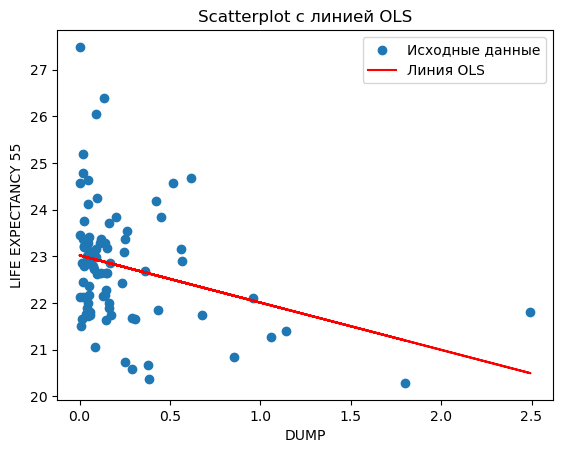

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LIFE EXPECTANCY 55   R-squared:                       0.091
Model:                            OLS   Adj. R-squared:                  0.080
Method:                 Least Squares   F-statistic:                     8.302
Date:                Mon, 03 Jun 2024   Prob (F-statistic):            0.00504
Time:                        22:41:50   Log-Likelihood:                -138.03
No. Observations:                  85   AIC:                             280.1
Df Residuals:                      83   BIC:                             284.9
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         23.0237      0.159    145.066      0.000      22.708      23.339
DUMP          -1.0127      0.351     -2.881      0.005      -1.712      -0.314
==============================================================================
Omnibus:                       17.187   Durbin-Watson:                   1.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               21.829
Skew:                           0.959   Prob(JB):                     1.82e-05
Kurtosis:                       4.576   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [24]:
name = 'DUMP'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY 55'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df['LIFE EXPECTANCY 55'], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel('LIFE EXPECTANCY 55')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

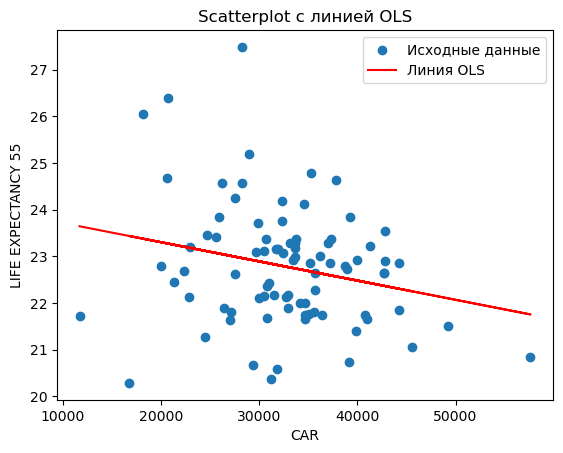

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LIFE EXPECTANCY 55   R-squared:                       0.057
Model:                            OLS   Adj. R-squared:                  0.045
Method:                 Least Squares   F-statistic:                     4.979
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0284
Time:                        22:41:50   Log-Likelihood:                -139.60
No. Observations:                  85   AIC:                             283.2
Df Residuals:                      83   BIC:                             288.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         24.1296      0.619     38.961      0.000      22.898      25.361
CAR        -4.117e-05   1.85e-05     -2.231      0.028   -7.79e-05   -4.47e-06
==============================================================================
Omnibus:                        9.067   Durbin-Watson:                   1.176
Prob(Omnibus):                  0.011   Jarque-Bera (JB):               10.637
Skew:                           0.536   Prob(JB):                      0.00490
Kurtosis:                       4.362   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [25]:
name = 'CAR'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df['LIFE EXPECTANCY 55'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df['LIFE EXPECTANCY 55'], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel('LIFE EXPECTANCY 55')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

In [26]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['LIFE EXPECTANCY 55']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:     LIFE EXPECTANCY 55   R-squared:                       0.650
Model:                            OLS   Adj. R-squared:                  0.613
Method:                 Least Squares   F-statistic:                     17.62
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.49e-14
Time:                        22:41:50   Log-Likelihood:                -97.500
No. Observations:                  85   AIC:                             213.0
Df Residuals:                      76   BIC:                             235.0
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 19.3833      0.896     21.625      0.000      17.598      21.169
AIR POL 2022          -1.0276      0.642     -1.600      0.114      -2.307       0.252
WATER POL              1.0967      1.118      0.981      0.330      -1.131       3.324
DUMP                  -0.5864      0.240     -2.441      0.017      -1.065      -0.108
CAR                -1.039e-05   1.23e-05     -0.842      0.403    -3.5e-05    1.42e-05
AVERAGE INCOME      3.152e-06   5.52e-06      0.571      0.570   -7.85e-06    1.42e-05
HEALTHY PERCENTAGE     0.0243      0.018      1.344      0.183      -0.012       0.060
PEOPLE PER BED         0.0283      0.005      6.084      0.000       0.019       0.038
DENSITY                0.0006      0.000      4.135      0.000       0.000       0.001
==============================================================================
Omnibus:                        6.373   Durbin-Watson:                   1.466
Prob(Omnibus):                  0.041   Jarque-Bera (JB):                5.762
Skew:                           0.530   Prob(JB):                       0.0561
Kurtosis:                       3.711   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [27]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 13.10033646378156),
 ('p-value', 0.10844366415368221),
 ('f-value', 1.7309287733068912),
 ('f p-value', 0.10480298731911263)]

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

             Variable         VIF
0               const  105.176905
1        AIR POL 2022    1.105771
2           WATER POL    1.190326
3                DUMP    1.110076
4                 CAR    1.102966
5      AVERAGE INCOME    1.433176
6  HEALTHY PERCENTAGE    1.343890
7      PEOPLE PER BED    1.583740
8             DENSITY    1.251883


In [29]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 13.10033646378156),
 ('p-value', 0.10844366415368221),
 ('f-value', 1.7309287733068912),
 ('f p-value', 0.10480298731911263)]

In [30]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

             Variable         VIF
0               const  105.176905
1        AIR POL 2022    1.105771
2           WATER POL    1.190326
3                DUMP    1.110076
4                 CAR    1.102966
5      AVERAGE INCOME    1.433176
6  HEALTHY PERCENTAGE    1.343890
7      PEOPLE PER BED    1.583740
8             DENSITY    1.251883


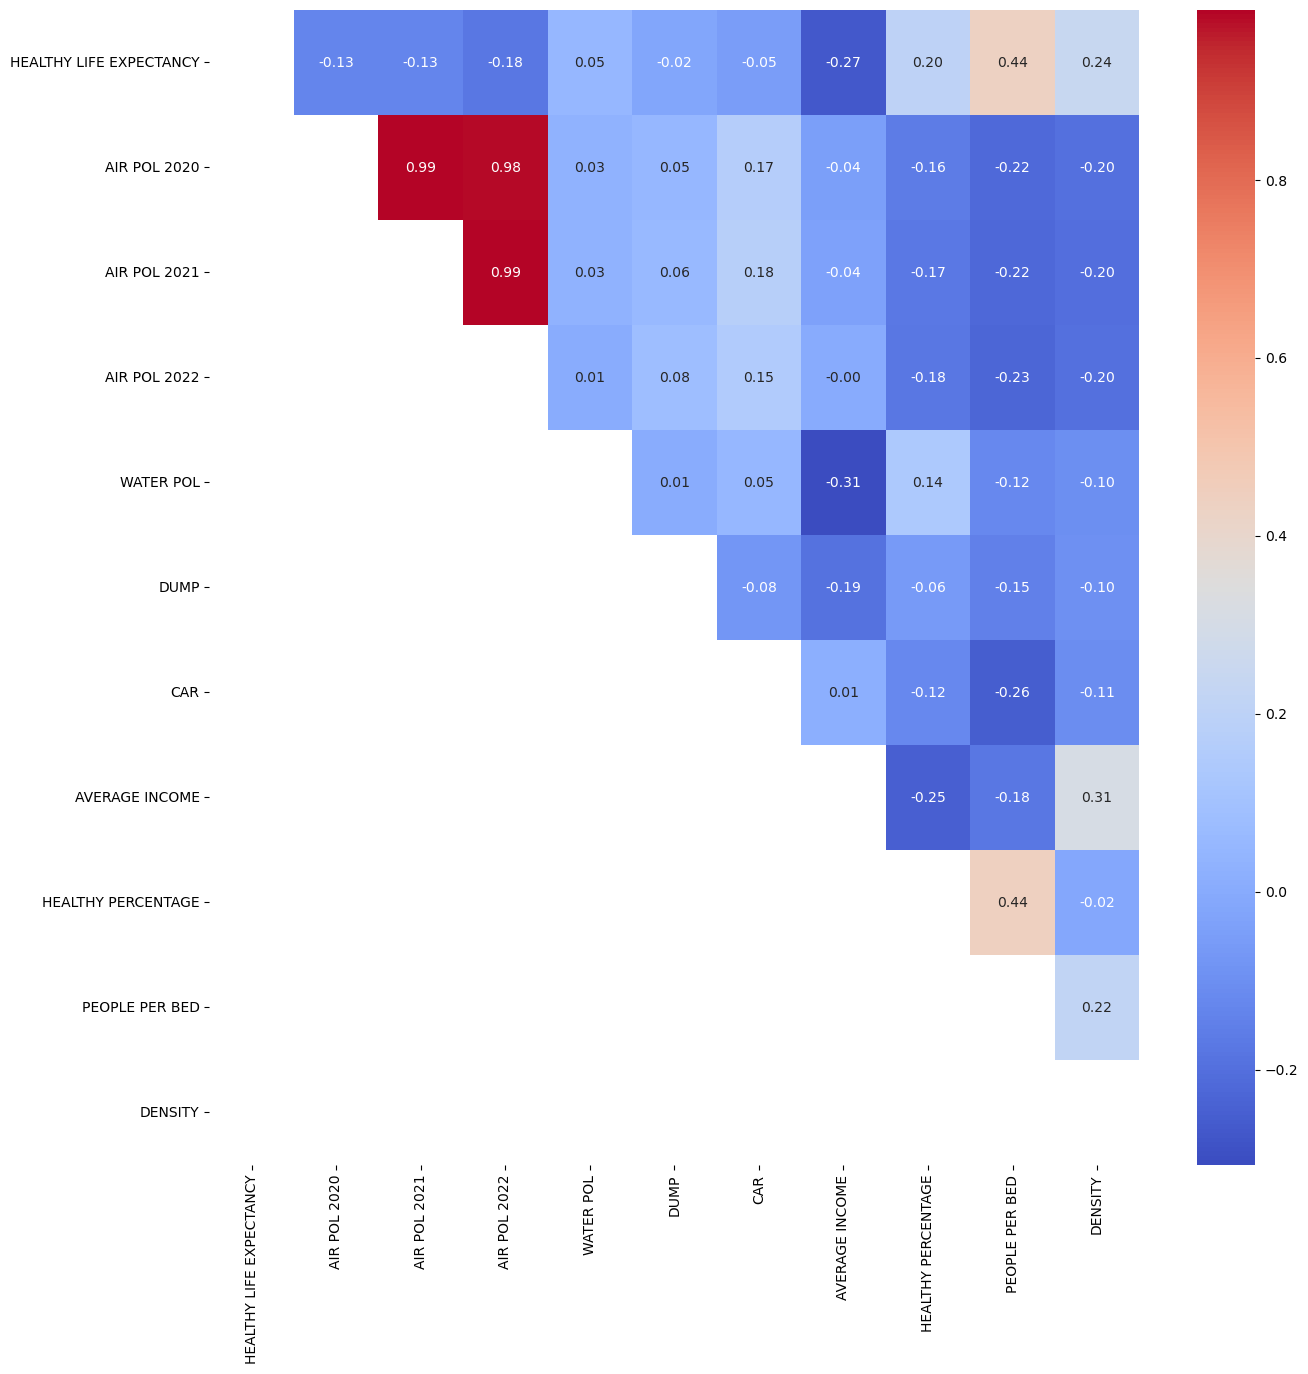

In [31]:
df3 = df[['HEALTHY LIFE EXPECTANCY','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df3.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [32]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['HEALTHY LIFE EXPECTANCY']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HEALTHY LIFE EXPECTANCY   R-squared:                       0.294
Model:                                 OLS   Adj. R-squared:                  0.219
Method:                      Least Squares   F-statistic:                     3.947
Date:                     Mon, 03 Jun 2024   Prob (F-statistic):           0.000600
Time:                             22:41:52   Log-Likelihood:                -235.64
No. Observations:                       85   AIC:                             489.3
Df Residuals:                           76   BIC:                             511.3
Df Model:                                8                                         
Covariance Type:                 nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                 50.1700      4.553     11.019      0.000      41.102      59.238
AIR POL 2022          -2.1728      3.263     -0.666      0.508      -8.673       4.327
WATER POL              1.8905      5.681      0.333      0.740      -9.424      13.205
DUMP                   0.1725      1.220      0.141      0.888      -2.258       2.603
CAR                 4.861e-05   6.27e-05      0.775      0.440   -7.62e-05       0.000
AVERAGE INCOME     -6.688e-05   2.81e-05     -2.384      0.020      -0.000    -1.1e-05
HEALTHY PERCENTAGE    -0.0168      0.092     -0.183      0.855      -0.200       0.166
PEOPLE PER BED         0.0684      0.024      2.896      0.005       0.021       0.115
DENSITY                0.0017      0.001      2.340      0.022       0.000       0.003
==============================================================================
Omnibus:                       51.463   Durbin-Watson:                   1.597
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              211.404
Skew:                          -1.907   Prob(JB):                     1.24e-46
Kurtosis:                       9.719   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [33]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 2.9540059040512334),
 ('p-value', 0.9372106494895387),
 ('f-value', 0.3420405395499064),
 ('f p-value', 0.9466744567762213)]

In [34]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

             Variable         VIF
0               const  105.176905
1        AIR POL 2022    1.105771
2           WATER POL    1.190326
3                DUMP    1.110076
4                 CAR    1.102966
5      AVERAGE INCOME    1.433176
6  HEALTHY PERCENTAGE    1.343890
7      PEOPLE PER BED    1.583740
8             DENSITY    1.251883


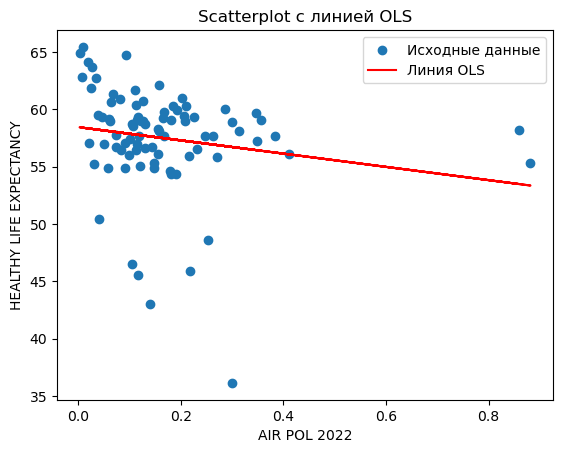

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HEALTHY LIFE EXPECTANCY   R-squared:                       0.032
Model:                                 OLS   Adj. R-squared:                  0.021
Method:                      Least Squares   F-statistic:                     2.763
Date:                     Mon, 03 Jun 2024   Prob (F-statistic):              0.100
Time:                             22:41:52   Log-Likelihood:                -249.02
No. Observations:                       85   AIC:                             502.0
Df Residuals:                           83   BIC:                             506.9
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const           58.4558      0.756     77.367      0.000      56.953      59.959
AIR POL 2022    -5.7772      3.476     -1.662      0.100     -12.690       1.136
==============================================================================
Omnibus:                       49.941   Durbin-Watson:                   1.257
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.932
Skew:                          -1.987   Prob(JB):                     1.87e-35
Kurtosis:                       8.419   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [35]:
name = 'AIR POL 2022'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df['HEALTHY LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df['HEALTHY LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel('HEALTHY LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

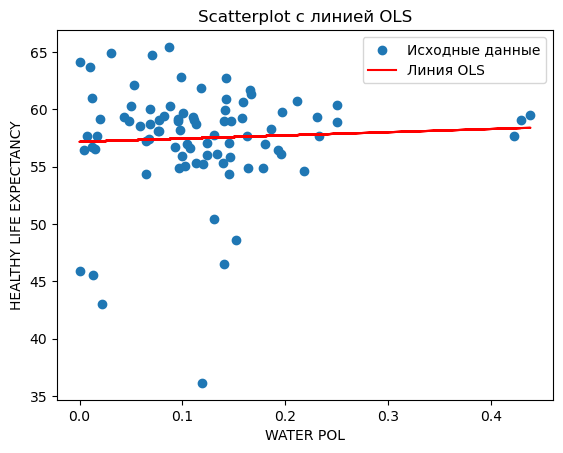

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HEALTHY LIFE EXPECTANCY   R-squared:                       0.003
Model:                                 OLS   Adj. R-squared:                 -0.009
Method:                      Least Squares   F-statistic:                    0.2229
Date:                     Mon, 03 Jun 2024   Prob (F-statistic):              0.638
Time:                             22:41:52   Log-Likelihood:                -250.30
No. Observations:                       85   AIC:                             504.6
Df Residuals:                           83   BIC:                             509.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.1743      0.872     65.536      0.000      55.439      58.909
WATER POL      2.7952      5.920      0.472      0.638      -8.980      14.570
==============================================================================
Omnibus:                       47.956   Durbin-Watson:                   1.258
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              159.986
Skew:                          -1.861   Prob(JB):                     1.82e-35
Kurtosis:                       8.596   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [36]:
name = 'WATER POL'
name2 = 'HEALTHY LIFE EXPECTANCY'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

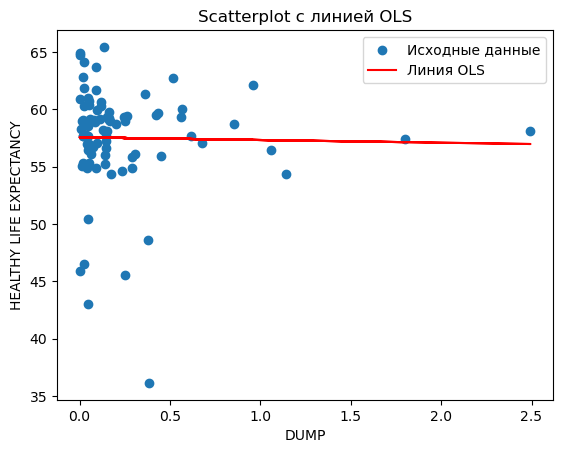

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HEALTHY LIFE EXPECTANCY   R-squared:                       0.000
Model:                                 OLS   Adj. R-squared:                 -0.012
Method:                      Least Squares   F-statistic:                   0.03138
Date:                     Mon, 03 Jun 2024   Prob (F-statistic):              0.860
Time:                             22:41:52   Log-Likelihood:                -250.40
No. Observations:                       85   AIC:                             504.8
Df Residuals:                           83   BIC:                             509.7
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.5660      0.595     96.696      0.000      56.382      58.750
DUMP          -0.2335      1.318     -0.177      0.860      -2.856       2.389
==============================================================================
Omnibus:                       49.411   Durbin-Watson:                   1.250
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              166.783
Skew:                          -1.926   Prob(JB):                     6.08e-37
Kurtosis:                       8.680   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [37]:
name = 'DUMP'
name2 = 'HEALTHY LIFE EXPECTANCY'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

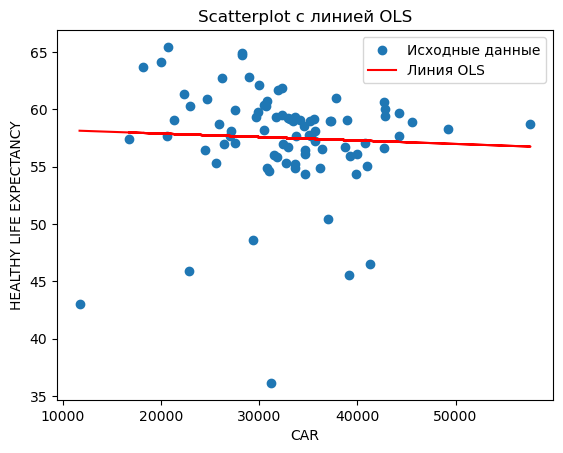

<class 'statsmodels.iolib.summary.Summary'>
"""
                               OLS Regression Results                              
===================================================================================
Dep. Variable:     HEALTHY LIFE EXPECTANCY   R-squared:                       0.002
Model:                                 OLS   Adj. R-squared:                 -0.010
Method:                      Least Squares   F-statistic:                    0.1967
Date:                     Mon, 03 Jun 2024   Prob (F-statistic):              0.659
Time:                             22:41:53   Log-Likelihood:                -250.31
No. Observations:                       85   AIC:                             504.6
Df Residuals:                           83   BIC:                             509.5
Df Model:                                1                                         
Covariance Type:                 nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         58.4954      2.278     25.676      0.000      53.964      63.027
CAR         -3.01e-05   6.79e-05     -0.443      0.659      -0.000       0.000
==============================================================================
Omnibus:                       51.497   Durbin-Watson:                   1.249
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              181.001
Skew:                          -2.004   Prob(JB):                     4.97e-40
Kurtosis:                       8.920   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [38]:
x = sm.add_constant(df1['CAR'])

# Оцениваем модель OLS
model = sm.OLS(df['HEALTHY LIFE EXPECTANCY'], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df['CAR'], df['HEALTHY LIFE EXPECTANCY'], label='Исходные данные')
plt.plot(df['CAR'], predicted_y, color='red', label='Линия OLS')
plt.xlabel('CAR')
plt.ylabel('HEALTHY LIFE EXPECTANCY')
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

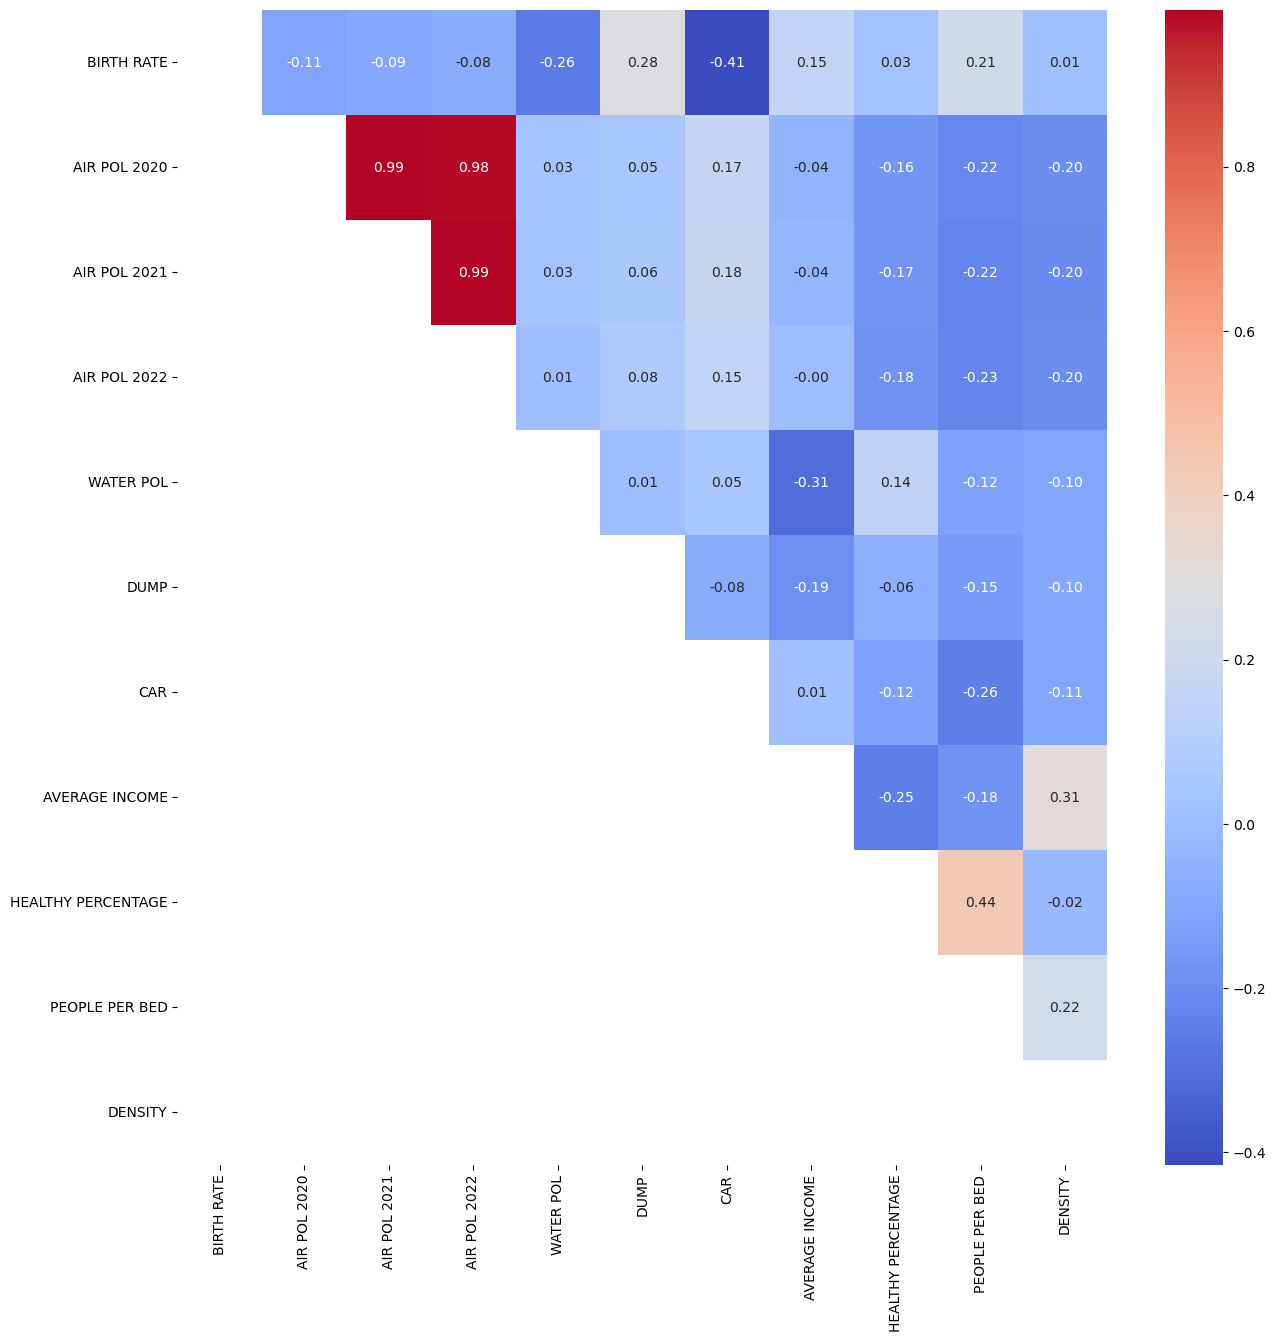

In [39]:
df4 = df[['BIRTH RATE','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df4.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [40]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['BIRTH RATE']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTH RATE   R-squared:                       0.359
Model:                            OLS   Adj. R-squared:                  0.292
Method:                 Least Squares   F-statistic:                     5.326
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           2.57e-05
Time:                        22:41:53   Log-Likelihood:                -566.66
No. Observations:                  85   AIC:                             1151.
Df Residuals:                      76   BIC:                             1173.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                858.7960    223.665      3.840      0.000     413.328    1304.264
AIR POL 2022         -47.2650    160.312     -0.295      0.769    -366.554     272.024
WATER POL           -430.5569    279.067     -1.543      0.127    -986.367     125.253
DUMP                 199.3260     59.944      3.325      0.001      79.938     318.714
CAR                   -0.0108      0.003     -3.515      0.001      -0.017      -0.005
AVERAGE INCOME         0.0032      0.001      2.318      0.023       0.000       0.006
HEALTHY PERCENTAGE    -0.7888      4.512     -0.175      0.862      -9.774       8.197
PEOPLE PER BED         2.3537      1.160      2.029      0.046       0.044       4.664
DENSITY               -0.0506      0.035     -1.426      0.158      -0.121       0.020
==============================================================================
Omnibus:                       39.994   Durbin-Watson:                   1.312
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              146.867
Skew:                           1.438   Prob(JB):                     1.28e-32
Kurtosis:                       8.762   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [41]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 13.87580920423016),
 ('p-value', 0.08506038599255811),
 ('f-value', 1.8533804879229159),
 ('f p-value', 0.08005883727570566)]

In [42]:





from statsmodels.stats.outliers_influence import variance_inflation_factor
VIFs = pd.DataFrame()
VIFs['Variable'] = X.columns
VIFs['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(VIFs)

             Variable         VIF
0               const  105.176905
1        AIR POL 2022    1.105771
2           WATER POL    1.190326
3                DUMP    1.110076
4                 CAR    1.102966
5      AVERAGE INCOME    1.433176
6  HEALTHY PERCENTAGE    1.343890
7      PEOPLE PER BED    1.583740
8             DENSITY    1.251883


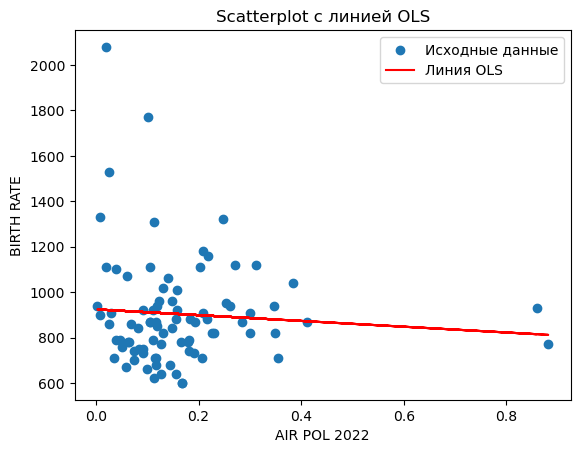

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTH RATE   R-squared:                       0.006
Model:                            OLS   Adj. R-squared:                 -0.006
Method:                 Least Squares   F-statistic:                    0.4909
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.485
Time:                        22:41:54   Log-Likelihood:                -585.33
No. Observations:                  85   AIC:                             1175.
Df Residuals:                      83   BIC:                             1180.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          924.0138     39.499     23.393      0.000     845.452    1002.576
AIR POL 2022  -127.3118    181.707     -0.701      0.485    -488.719     234.095
==============================================================================
Omnibus:                       57.195   Durbin-Watson:                   1.131
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              238.271
Skew:                           2.182   Prob(JB):                     1.82e-52
Kurtosis:                       9.945   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [43]:
name = 'AIR POL 2022'
name2 = 'BIRTH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

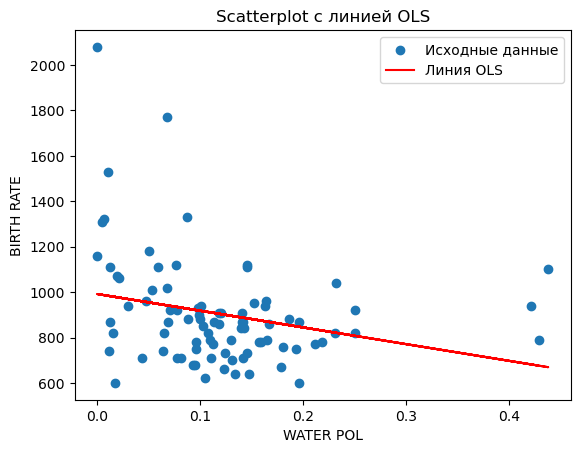

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTH RATE   R-squared:                       0.070
Model:                            OLS   Adj. R-squared:                  0.058
Method:                 Least Squares   F-statistic:                     6.211
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0147
Time:                        22:41:54   Log-Likelihood:                -582.51
No. Observations:                  85   AIC:                             1169.
Df Residuals:                      83   BIC:                             1174.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        991.5231     43.463     22.813      0.000     905.078    1077.968
WATER POL   -735.0392    294.933     -2.492      0.015   -1321.649    -148.430
==============================================================================
Omnibus:                       51.678   Durbin-Watson:                   0.994
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.249
Skew:                           1.987   Prob(JB):                     8.04e-42
Kurtosis:                       9.136   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [44]:
name = 'WATER POL'
name2 = 'BIRTH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

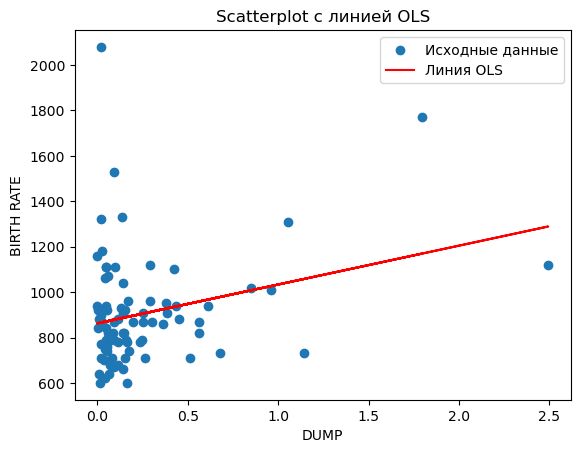

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTH RATE   R-squared:                       0.076
Model:                            OLS   Adj. R-squared:                  0.065
Method:                 Least Squares   F-statistic:                     6.851
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0105
Time:                        22:41:54   Log-Likelihood:                -582.21
No. Observations:                  85   AIC:                             1168.
Df Residuals:                      83   BIC:                             1173.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        862.3322     29.519     29.213      0.000     803.620     921.044
DUMP         171.0955     65.368      2.617      0.011      41.082     301.109
==============================================================================
Omnibus:                       63.324   Durbin-Watson:                   1.300
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              334.543
Skew:                           2.346   Prob(JB):                     2.26e-73
Kurtosis:                      11.512   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [45]:
name = 'DUMP'
name2 = 'BIRTH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

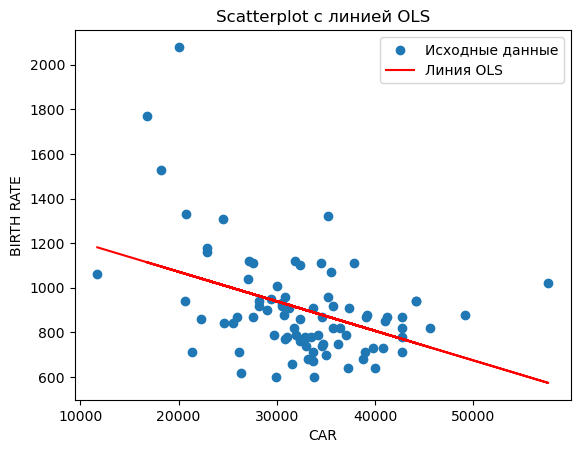

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             BIRTH RATE   R-squared:                       0.172
Model:                            OLS   Adj. R-squared:                  0.162
Method:                 Least Squares   F-statistic:                     17.26
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           7.88e-05
Time:                        22:41:54   Log-Likelihood:                -577.55
No. Observations:                  85   AIC:                             1159.
Df Residuals:                      83   BIC:                             1164.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1336.8079    107.046     12.488      0.000    1123.899    1549.717
CAR           -0.0132      0.003     -4.154      0.000      -0.020      -0.007
==============================================================================
Omnibus:                       41.631   Durbin-Watson:                   1.192
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.308
Skew:                           1.643   Prob(JB):                     7.51e-27
Kurtosis:                       7.814   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [46]:
name = 'CAR'
name2 = 'BIRTH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

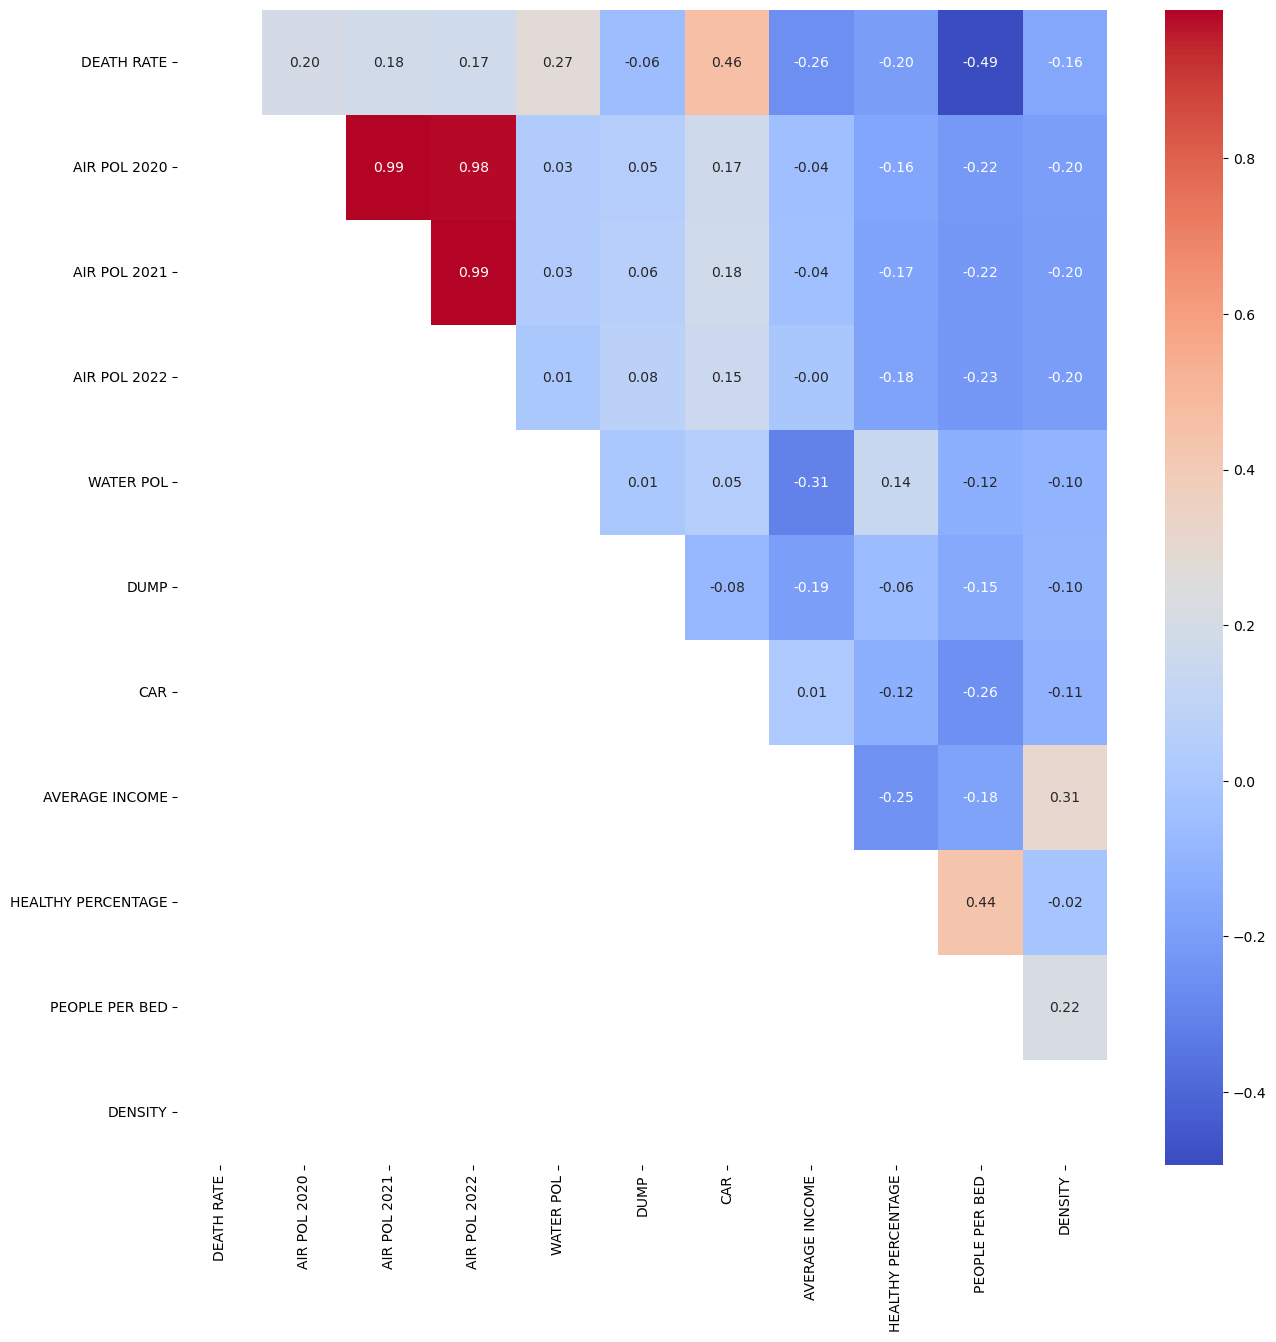

In [47]:
df5 = df[['DEATH RATE','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df5.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [48]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['DEATH RATE']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATH RATE   R-squared:                       0.530
Model:                            OLS   Adj. R-squared:                  0.480
Method:                 Least Squares   F-statistic:                     10.70
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.07e-10
Time:                        22:41:55   Log-Likelihood:                -574.72
No. Observations:                  85   AIC:                             1167.
Df Residuals:                      76   BIC:                             1189.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               1936.2750    245.912      7.874      0.000    1446.500    2426.051
AIR POL 2022          77.8123    176.257      0.441      0.660    -273.234     428.858
WATER POL            348.2881    306.824      1.135      0.260    -262.804     959.380
DUMP                -142.2899     65.906     -2.159      0.034    -273.553     -11.027
CAR                    0.0132      0.003      3.910      0.000       0.006       0.020
AVERAGE INCOME        -0.0064      0.002     -4.234      0.000      -0.009      -0.003
HEALTHY PERCENTAGE    -3.5923      4.960     -0.724      0.471     -13.472       6.287
PEOPLE PER BED        -6.2014      1.275     -4.863      0.000      -8.741      -3.662
DENSITY                0.0444      0.039      1.138      0.259      -0.033       0.122
==============================================================================
Omnibus:                        2.898   Durbin-Watson:                   1.293
Prob(Omnibus):                  0.235   Jarque-Bera (JB):                2.818
Skew:                          -0.391   Prob(JB):                        0.244
Kurtosis:                       2.569   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [49]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 11.451064413216063),
 ('p-value', 0.1774271455292567),
 ('f-value', 1.479084789707008),
 ('f p-value', 0.1789402706491292)]

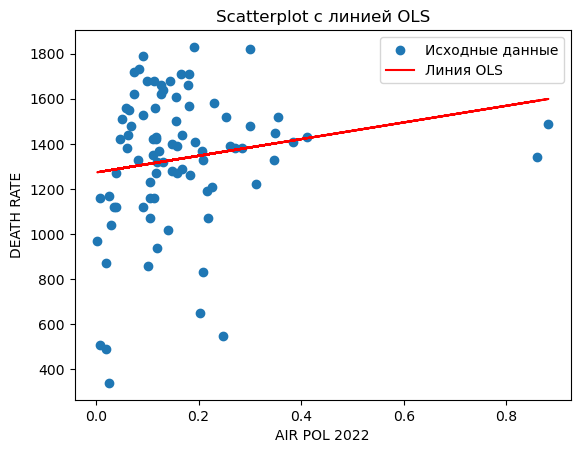

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATH RATE   R-squared:                       0.030
Model:                            OLS   Adj. R-squared:                  0.018
Method:                 Least Squares   F-statistic:                     2.578
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.112
Time:                        22:41:55   Log-Likelihood:                -605.48
No. Observations:                  85   AIC:                             1215.
Df Residuals:                      83   BIC:                             1220.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         1273.2401     50.064     25.432      0.000    1173.665    1372.815
AIR POL 2022   369.7918    230.307      1.606      0.112     -88.280     827.863
==============================================================================
Omnibus:                       14.750   Durbin-Watson:                   0.960
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               16.503
Skew:                          -0.943   Prob(JB):                     0.000261
Kurtosis:                       4.050   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [50]:
name = 'AIR POL 2022'
name2 = 'DEATH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

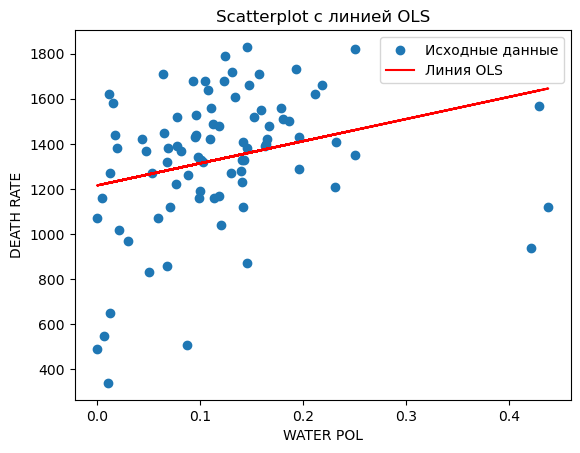

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATH RATE   R-squared:                       0.075
Model:                            OLS   Adj. R-squared:                  0.064
Method:                 Least Squares   F-statistic:                     6.746
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0111
Time:                        22:41:55   Log-Likelihood:                -603.46
No. Observations:                  85   AIC:                             1211.
Df Residuals:                      83   BIC:                             1216.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1215.9668     55.605     21.868      0.000    1105.370    1326.563
WATER POL    980.0727    377.331      2.597      0.011     229.576    1730.569
==============================================================================
Omnibus:                       14.064   Durbin-Watson:                   0.784
Prob(Omnibus):                  0.001   Jarque-Bera (JB):               15.303
Skew:                          -0.961   Prob(JB):                     0.000475
Kurtosis:                       3.790   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [51]:
name = 'WATER POL'
name2 = 'DEATH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

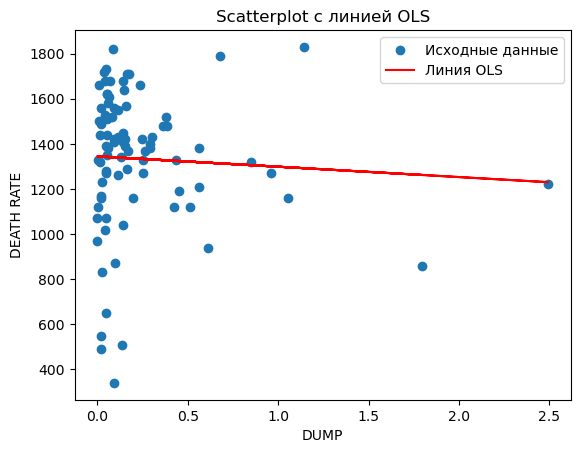

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATH RATE   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2780
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.599
Time:                        22:41:55   Log-Likelihood:                -606.63
No. Observations:                  85   AIC:                             1217.
Df Residuals:                      83   BIC:                             1222.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       1344.7305     39.346     34.177      0.000    1266.474    1422.987
DUMP         -45.9354     87.128     -0.527      0.599    -219.229     127.358
==============================================================================
Omnibus:                       19.277   Durbin-Watson:                   1.005
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.337
Skew:                          -1.097   Prob(JB):                     5.19e-06
Kurtosis:                       4.435   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [52]:
name = 'DUMP'
name2 = 'DEATH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

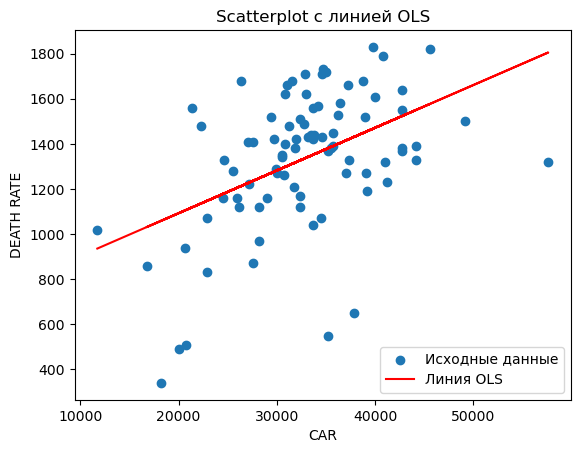

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATH RATE   R-squared:                       0.214
Model:                            OLS   Adj. R-squared:                  0.204
Method:                 Least Squares   F-statistic:                     22.57
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           8.39e-06
Time:                        22:41:56   Log-Likelihood:                -596.55
No. Observations:                  85   AIC:                             1197.
Df Residuals:                      83   BIC:                             1202.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        713.6202    133.861      5.331      0.000     447.377     979.864
CAR            0.0189      0.004      4.751      0.000       0.011       0.027
==============================================================================
Omnibus:                       12.912   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.002   Jarque-Bera (JB):               13.763
Skew:                          -0.877   Prob(JB):                      0.00103
Kurtosis:                       3.901   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [53]:
name = 'CAR'
name2 = 'DEATH RATE'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

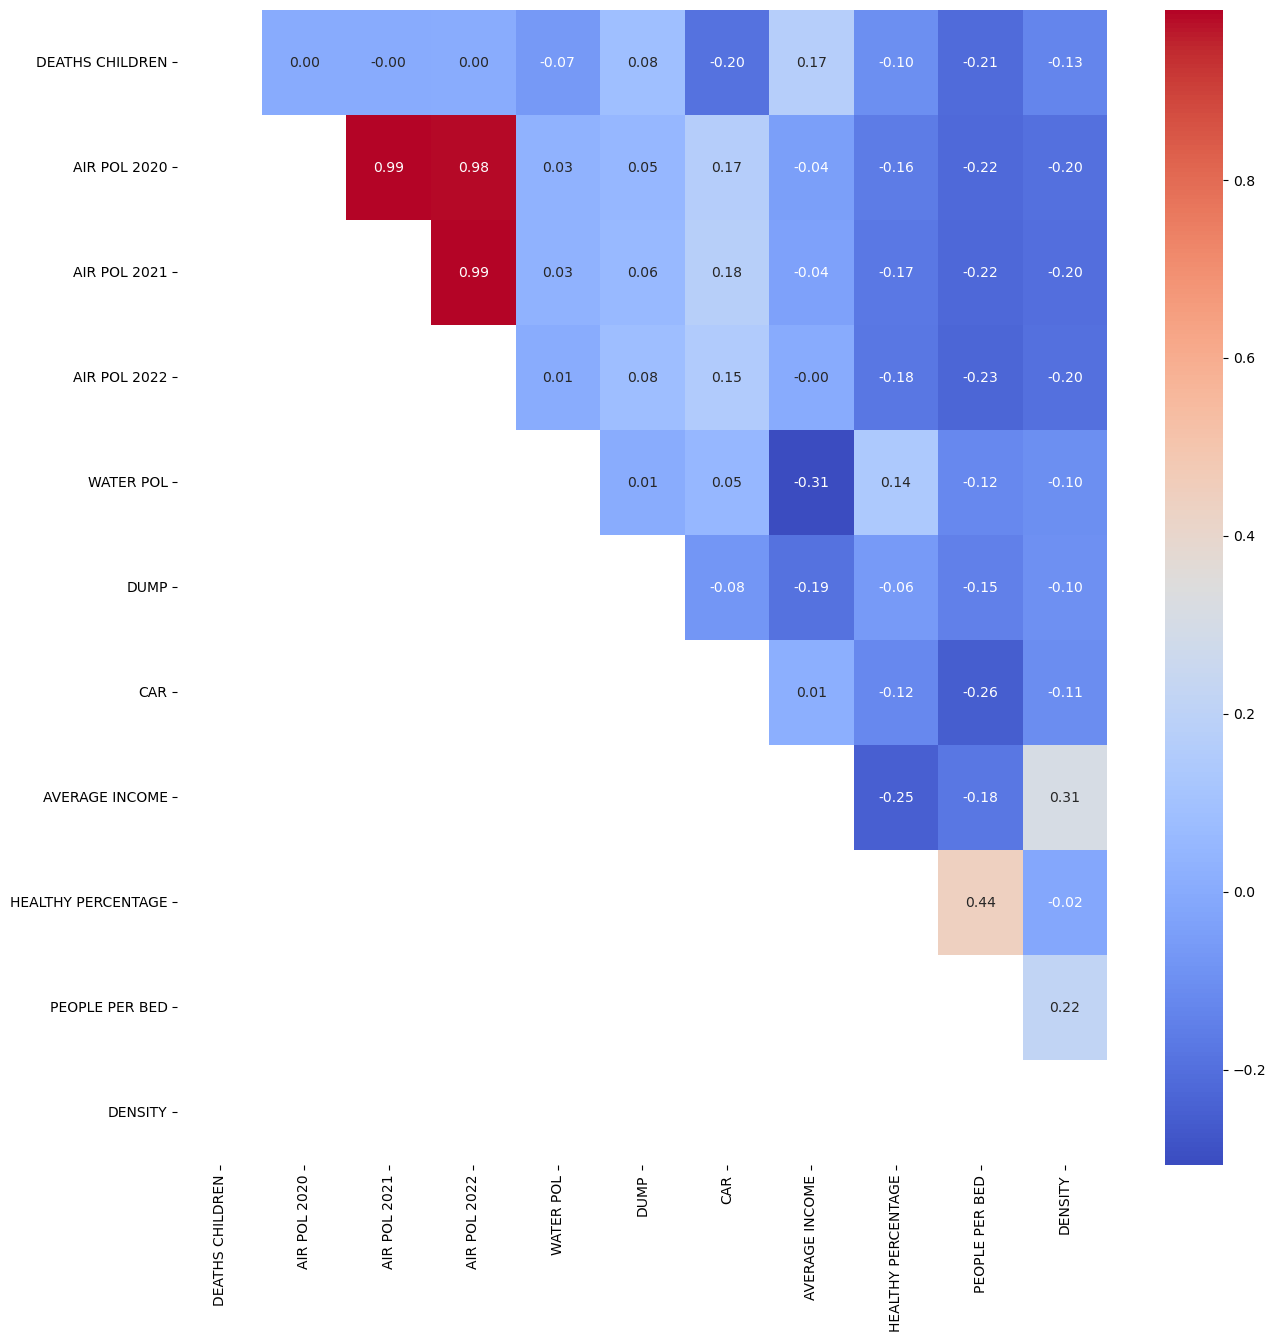

In [54]:
df6 = df[['DEATHS CHILDREN','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df6.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

In [55]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['DEATHS CHILDREN']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.796
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0909
Time:                        22:41:56   Log-Likelihood:                -544.08
No. Observations:                  85   AIC:                             1106.
Df Residuals:                      76   BIC:                             1128.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                784.3960    171.486      4.574      0.000     442.851    1125.941
AIR POL 2022         -48.4438    122.913     -0.394      0.695    -293.246     196.358
WATER POL            -75.6417    213.963     -0.354      0.725    -501.787     350.503
DUMP                  23.1796     45.959      0.504      0.615     -68.356     114.716
CAR                   -0.0055      0.002     -2.333      0.022      -0.010      -0.001
AVERAGE INCOME         0.0016      0.001      1.525      0.131      -0.000       0.004
HEALTHY PERCENTAGE     0.2354      3.459      0.068      0.946      -6.654       7.125
PEOPLE PER BED        -1.4424      0.889     -1.622      0.109      -3.214       0.329
DENSITY               -0.0416      0.027     -1.528      0.131      -0.096       0.013
==============================================================================
Omnibus:                       57.411   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.025
Skew:                           2.035   Prob(JB):                     1.76e-68
Kurtosis:                      11.458   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [56]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 34.28512615711735),
 ('p-value', 3.6066882454710863e-05),
 ('f-value', 6.422350561329947),
 ('f p-value', 2.3562962905338574e-06)]

In [57]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['DEATHS CHILDREN']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.159
Model:                            OLS   Adj. R-squared:                  0.070
Method:                 Least Squares   F-statistic:                     1.796
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0909
Time:                        22:41:56   Log-Likelihood:                -544.08
No. Observations:                  85   AIC:                             1106.
Df Residuals:                      76   BIC:                             1128.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                784.3960    171.486      4.574      0.000     442.851    1125.941
AIR POL 2022         -48.4438    122.913     -0.394      0.695    -293.246     196.358
WATER POL            -75.6417    213.963     -0.354      0.725    -501.787     350.503
DUMP                  23.1796     45.959      0.504      0.615     -68.356     114.716
CAR                   -0.0055      0.002     -2.333      0.022      -0.010      -0.001
AVERAGE INCOME         0.0016      0.001      1.525      0.131      -0.000       0.004
HEALTHY PERCENTAGE     0.2354      3.459      0.068      0.946      -6.654       7.125
PEOPLE PER BED        -1.4424      0.889     -1.622      0.109      -3.214       0.329
DENSITY               -0.0416      0.027     -1.528      0.131      -0.096       0.013
==============================================================================
Omnibus:                       57.411   Durbin-Watson:                   1.514
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.025
Skew:                           2.035   Prob(JB):                     1.76e-68
Kurtosis:                      11.458   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

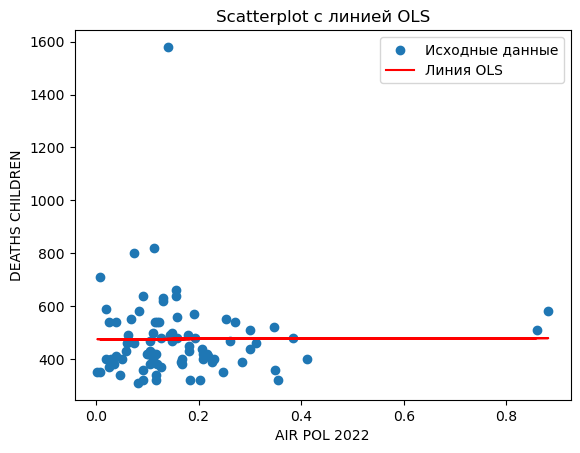

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                  0.001234
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.972
Time:                        22:41:56   Log-Likelihood:                -551.44
No. Observations:                  85   AIC:                             1107.
Df Residuals:                      83   BIC:                             1112.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          475.2989     26.512     17.928      0.000     422.568     528.030
AIR POL 2022     4.2838    121.962      0.035      0.972    -238.293     246.861
==============================================================================
Omnibus:                      110.291   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2475.029
Skew:                           4.137   Prob(JB):                         0.00
Kurtosis:                      28.107   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [58]:
name = 'AIR POL 2022'
name2 = 'DEATHS CHILDREN'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

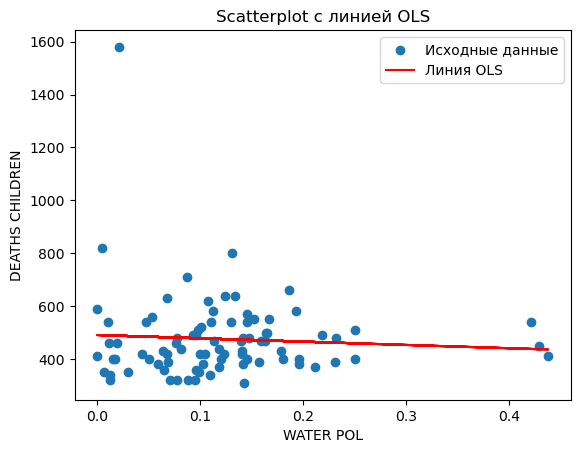

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                 -0.008
Method:                 Least Squares   F-statistic:                    0.3714
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.544
Time:                        22:41:57   Log-Likelihood:                -551.25
No. Observations:                  85   AIC:                             1107.
Df Residuals:                      83   BIC:                             1111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        490.9562     30.088     16.317      0.000     431.113     550.800
WATER POL   -124.4346    204.174     -0.609      0.544    -530.528     281.659
==============================================================================
Omnibus:                      107.697   Durbin-Watson:                   1.281
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2286.930
Skew:                           4.005   Prob(JB):                         0.00
Kurtosis:                      27.116   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [59]:
name = 'WATER POL'
name2 = 'DEATHS CHILDREN'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

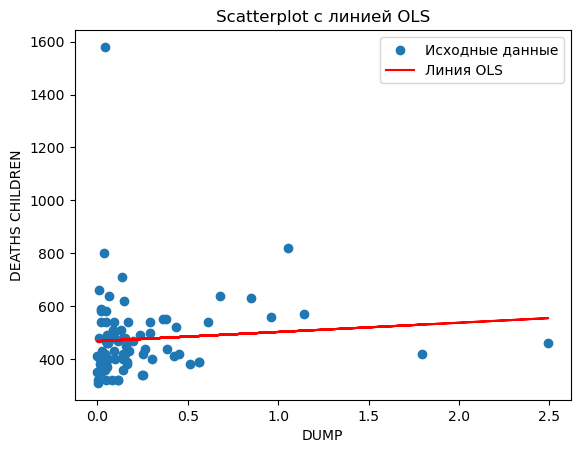

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.007
Model:                            OLS   Adj. R-squared:                 -0.005
Method:                 Least Squares   F-statistic:                    0.5928
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.444
Time:                        22:41:57   Log-Likelihood:                -551.14
No. Observations:                  85   AIC:                             1106.
Df Residuals:                      83   BIC:                             1111.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        467.6637     20.481     22.834      0.000     426.927     508.400
DUMP          34.9207     45.354      0.770      0.444     -55.286     125.128
==============================================================================
Omnibus:                      112.418   Durbin-Watson:                   1.288
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             2670.685
Skew:                           4.239   Prob(JB):                         0.00
Kurtosis:                      29.119   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [60]:
name = 'DUMP'
name2 = 'DEATHS CHILDREN'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

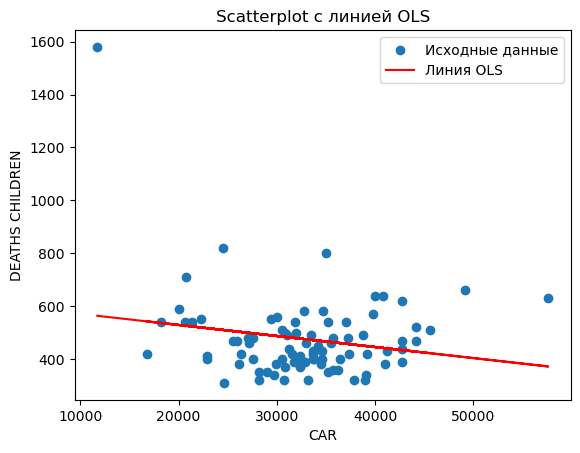

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:        DEATHS CHILDREN   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.027
Method:                 Least Squares   F-statistic:                     3.292
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0732
Time:                        22:41:57   Log-Likelihood:                -549.79
No. Observations:                  85   AIC:                             1104.
Df Residuals:                      83   BIC:                             1108.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        612.6284     77.218      7.934      0.000     459.046     766.211
CAR           -0.0042      0.002     -1.815      0.073      -0.009       0.000
==============================================================================
Omnibus:                       96.200   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1470.561
Skew:                           3.502   Prob(JB):                         0.00
Kurtosis:                      22.136   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [61]:
name = 'CAR'
name2 = 'DEATHS CHILDREN'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

In [62]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['DEATHS WORKING']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DEATHS WORKING   R-squared:                       0.651
Model:                            OLS   Adj. R-squared:                  0.614
Method:                 Least Squares   F-statistic:                     17.73
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.29e-14
Time:                        22:41:57   Log-Likelihood:                -495.97
No. Observations:                  85   AIC:                             1010.
Df Residuals:                      76   BIC:                             1032.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const                958.8601     97.363      9.848      0.000     764.944    1152.776
AIR POL 2022         172.9725     69.785      2.479      0.015      33.983     311.961
WATER POL             -3.6282    121.480     -0.030      0.976    -245.577     238.321
DUMP                  30.6397     26.094      1.174      0.244     -21.331      82.610
CAR                    0.0013      0.001      0.946      0.347      -0.001       0.004
AVERAGE INCOME         0.0004      0.001      0.630      0.531      -0.001       0.002
HEALTHY PERCENTAGE    -3.6816      1.964     -1.875      0.065      -7.593       0.230
PEOPLE PER BED        -3.4578      0.505     -6.849      0.000      -4.463      -2.452
DENSITY               -0.0254      0.015     -1.648      0.103      -0.056       0.005
==============================================================================
Omnibus:                        5.306   Durbin-Watson:                   1.564
Prob(Omnibus):                  0.070   Jarque-Bera (JB):                4.703
Skew:                          -0.561   Prob(JB):                       0.0952
Kurtosis:                       3.265   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [63]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 14.66154733806925),
 ('p-value', 0.06607033524881226),
 ('f-value', 1.9802070480723388),
 ('f p-value', 0.06027663852651519)]

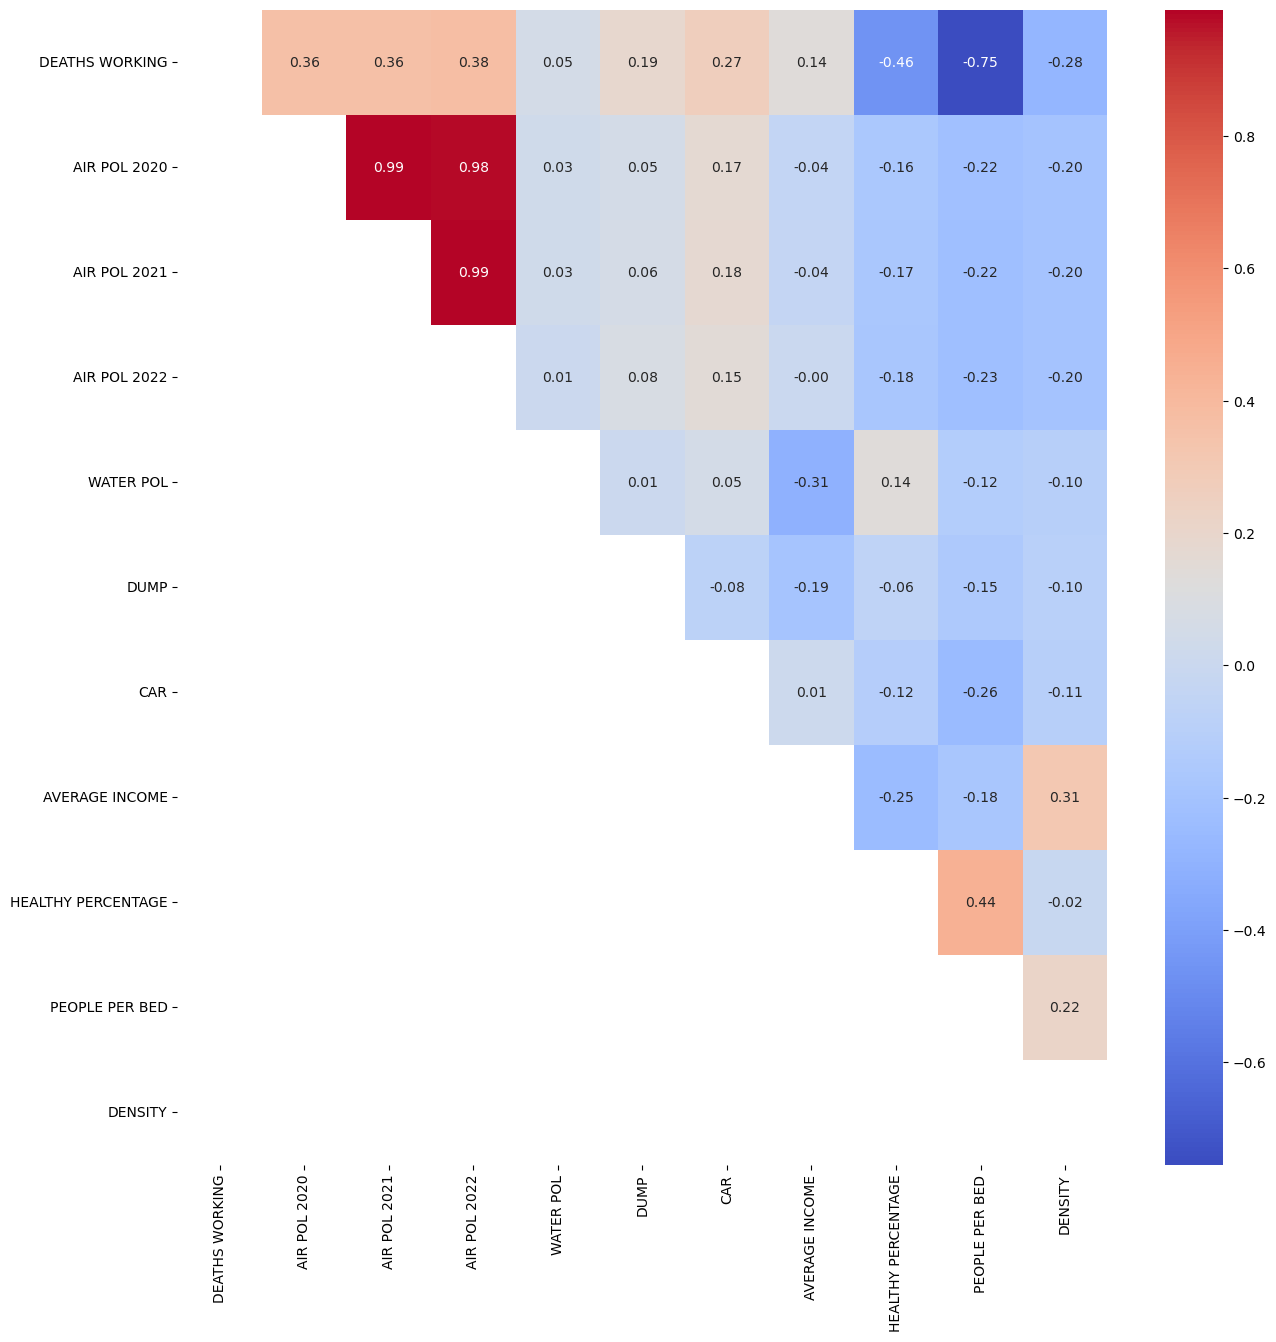

In [64]:
df7 = df[['DEATHS WORKING','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df7.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

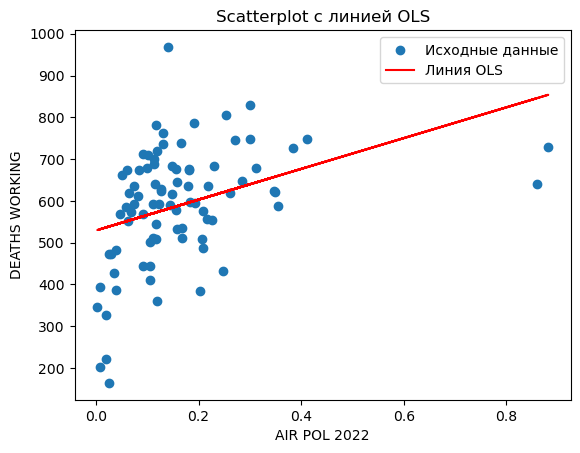

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DEATHS WORKING   R-squared:                       0.142
Model:                            OLS   Adj. R-squared:                  0.131
Method:                 Least Squares   F-statistic:                     13.68
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           0.000387
Time:                        22:41:58   Log-Likelihood:                -534.23
No. Observations:                  85   AIC:                             1072.
Df Residuals:                      83   BIC:                             1077.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          529.0251     21.653     24.432      0.000     485.959     572.091
AIR POL 2022   368.4749     99.608      3.699      0.000     170.359     566.591
==============================================================================
Omnibus:                        3.943   Durbin-Watson:                   0.946
Prob(Omnibus):                  0.139   Jarque-Bera (JB):                3.280
Skew:                          -0.350   Prob(JB):                        0.194
Kurtosis:                       3.660   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [65]:
name = 'AIR POL 2022'
name2 = 'DEATHS WORKING'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

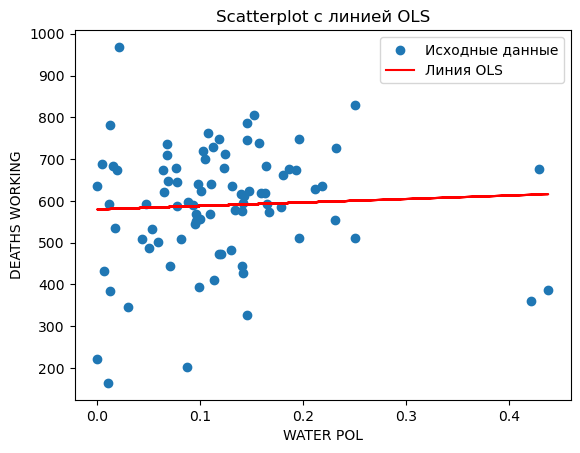

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DEATHS WORKING   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                 -0.009
Method:                 Least Squares   F-statistic:                    0.2125
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.646
Time:                        22:41:58   Log-Likelihood:                -540.61
No. Observations:                  85   AIC:                             1085.
Df Residuals:                      83   BIC:                             1090.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        579.3535     26.547     21.824      0.000     526.553     632.154
WATER POL     83.0383    180.144      0.461      0.646    -275.262     441.338
==============================================================================
Omnibus:                        7.919   Durbin-Watson:                   0.781
Prob(Omnibus):                  0.019   Jarque-Bera (JB):                7.646
Skew:                          -0.592   Prob(JB):                       0.0219
Kurtosis:                       3.869   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [66]:
name = 'WATER POL'
name2 = 'DEATHS WORKING'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

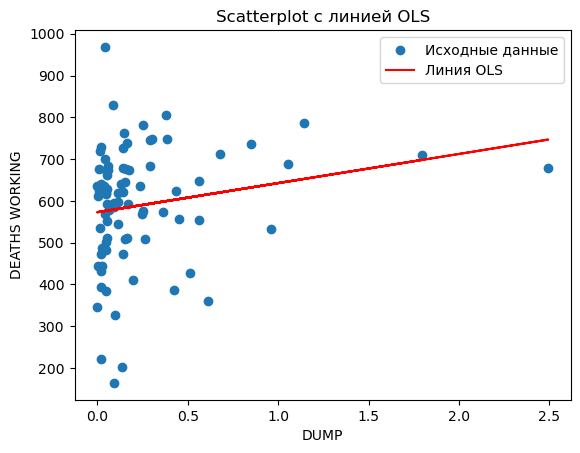

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DEATHS WORKING   R-squared:                       0.036
Model:                            OLS   Adj. R-squared:                  0.025
Method:                 Least Squares   F-statistic:                     3.136
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0802
Time:                        22:41:58   Log-Likelihood:                -539.14
No. Observations:                  85   AIC:                             1082.
Df Residuals:                      83   BIC:                             1087.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        572.6839     17.785     32.200      0.000     537.310     608.057
DUMP          69.7474     39.383      1.771      0.080      -8.584     148.079
==============================================================================
Omnibus:                        8.184   Durbin-Watson:                   0.735
Prob(Omnibus):                  0.017   Jarque-Bera (JB):                8.279
Skew:                          -0.571   Prob(JB):                       0.0159
Kurtosis:                       4.016   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [67]:
name = 'DUMP'
name2 = 'DEATHS WORKING'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

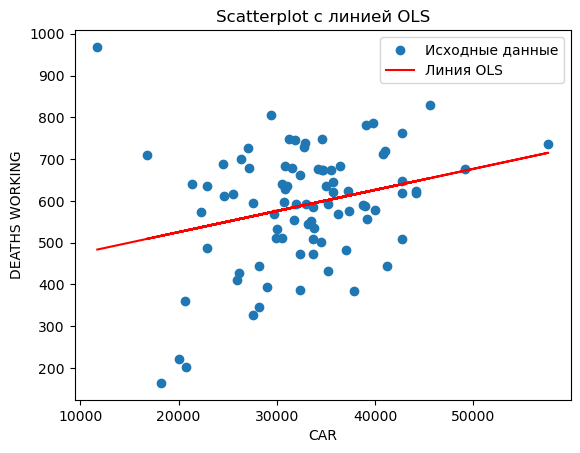

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:         DEATHS WORKING   R-squared:                       0.072
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     6.425
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0131
Time:                        22:41:59   Log-Likelihood:                -537.55
No. Observations:                  85   AIC:                             1079.
Df Residuals:                      83   BIC:                             1084.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        424.0692     66.862      6.342      0.000     291.083     557.055
CAR            0.0050      0.002      2.535      0.013       0.001       0.009
==============================================================================
Omnibus:                        4.213   Durbin-Watson:                   0.863
Prob(Omnibus):                  0.122   Jarque-Bera (JB):                5.197
Skew:                          -0.006   Prob(JB):                       0.0744
Kurtosis:                       4.211   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [68]:
name = 'CAR'
name2 = 'DEATHS WORKING'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

In [69]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['DEATHS OLD']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS OLD   R-squared:                       0.559
Model:                            OLS   Adj. R-squared:                  0.513
Method:                 Least Squares   F-statistic:                     12.04
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           6.13e-11
Time:                        22:41:59   Log-Likelihood:                -625.63
No. Observations:                  85   AIC:                             1269.
Df Residuals:                      76   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const               5364.0736    447.563     11.985      0.000    4472.674    6255.473
AIR POL 2022         181.1568    320.791      0.565      0.574    -457.753     820.067
WATER POL            549.9356    558.424      0.985      0.328    -562.263    1662.134
DUMP                   6.9751    119.950      0.058      0.954    -231.925     245.875
CAR                    0.0211      0.006      3.425      0.001       0.009       0.033
AVERAGE INCOME        -0.0148      0.003     -5.368      0.000      -0.020      -0.009
HEALTHY PERCENTAGE    -5.1289      9.028     -0.568      0.572     -23.110      12.852
PEOPLE PER BED       -11.0995      2.321     -4.782      0.000     -15.722      -6.477
DENSITY                0.0283      0.071      0.398      0.691      -0.113       0.170
==============================================================================
Omnibus:                        7.738   Durbin-Watson:                   1.388
Prob(Omnibus):                  0.021   Jarque-Bera (JB):                7.192
Skew:                          -0.655   Prob(JB):                       0.0274
Kurtosis:                       3.563   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [70]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 16.67615384988235),
 ('p-value', 0.03366358757867291),
 ('f-value', 2.3187140434951874),
 ('f p-value', 0.027760978511327642)]

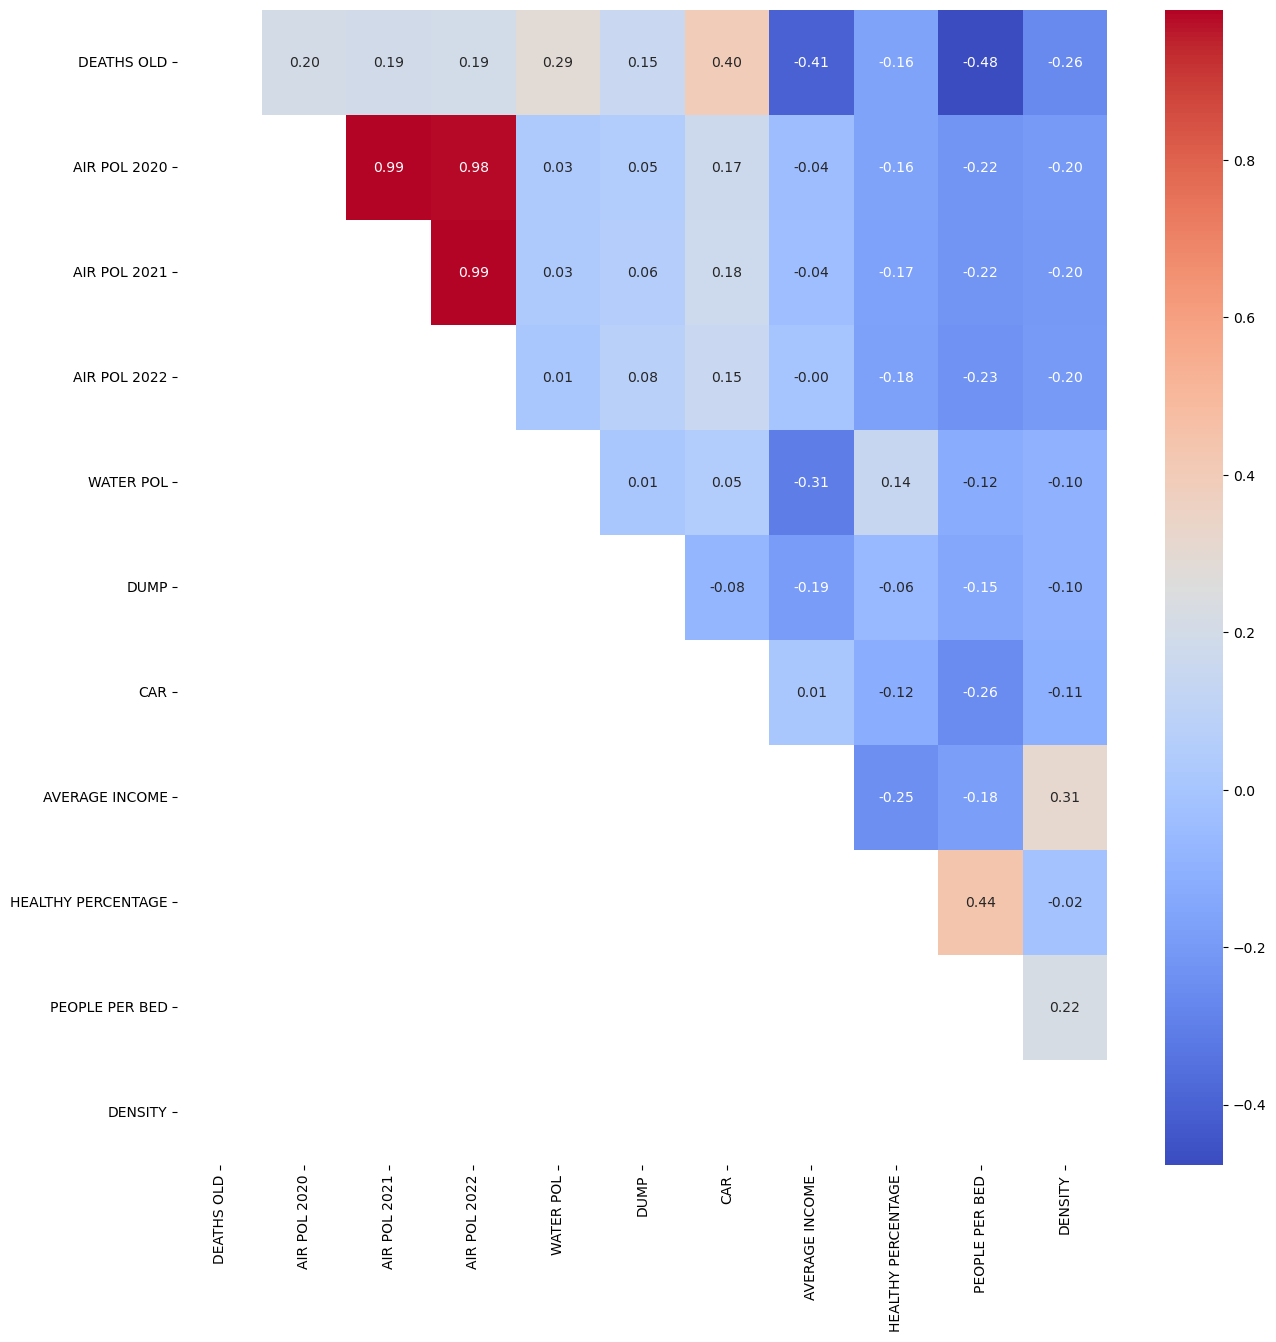

In [71]:
df7 = df[['DEATHS OLD','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df7.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

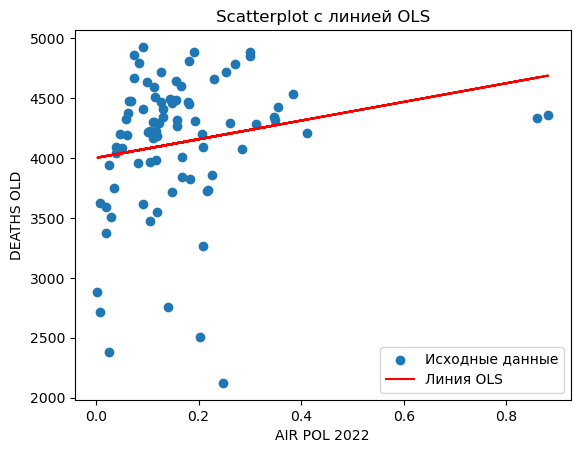

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS OLD   R-squared:                       0.038
Model:                            OLS   Adj. R-squared:                  0.026
Method:                 Least Squares   F-statistic:                     3.263
Date:                Mon, 03 Jun 2024   Prob (F-statistic):             0.0745
Time:                        22:42:00   Log-Likelihood:                -658.78
No. Observations:                  85   AIC:                             1322.
Df Residuals:                      83   BIC:                             1326.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const         3999.8782     93.724     42.677      0.000    3813.464    4186.292
AIR POL 2022   778.8353    431.157      1.806      0.074     -78.718    1636.388
==============================================================================
Omnibus:                       28.796   Durbin-Watson:                   1.265
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               46.943
Skew:                          -1.400   Prob(JB):                     6.41e-11
Kurtosis:                       5.328   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [72]:
name = 'AIR POL 2022'
name2 = 'DEATHS OLD'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

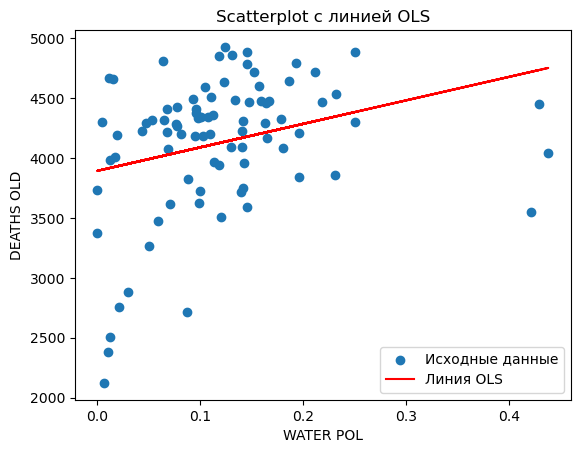

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS OLD   R-squared:                       0.085
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     7.703
Date:                Mon, 03 Jun 2024   Prob (F-statistic):            0.00681
Time:                        22:42:00   Log-Likelihood:                -656.64
No. Observations:                  85   AIC:                             1317.
Df Residuals:                      83   BIC:                             1322.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3892.0113    103.961     37.437      0.000    3685.237    4098.786
WATER POL   1958.0200    705.469      2.775      0.007     554.870    3361.170
==============================================================================
Omnibus:                       19.728   Durbin-Watson:                   1.113
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               24.417
Skew:                          -1.170   Prob(JB):                     4.99e-06
Kurtosis:                       4.190   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [73]:
name = 'WATER POL'
name2 = 'DEATHS OLD'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

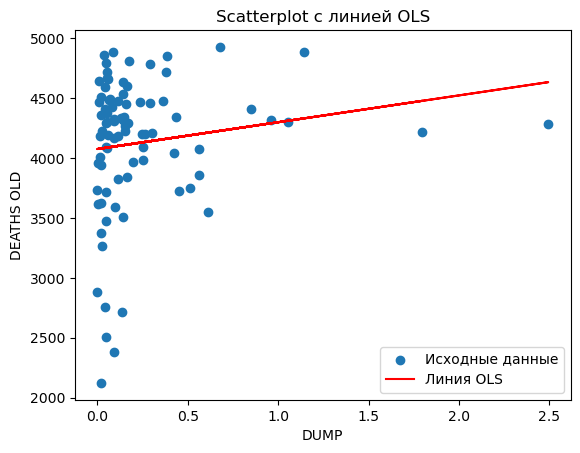

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS OLD   R-squared:                       0.022
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     1.901
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.172
Time:                        22:42:00   Log-Likelihood:                -659.45
No. Observations:                  85   AIC:                             1323.
Df Residuals:                      83   BIC:                             1328.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       4073.9672     73.243     55.623      0.000    3928.291    4219.644
DUMP         223.6268    162.190      1.379      0.172     -98.962     546.216
==============================================================================
Omnibus:                       25.788   Durbin-Watson:                   1.214
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               37.810
Skew:                          -1.334   Prob(JB):                     6.16e-09
Kurtosis:                       4.886   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [74]:
name = 'DUMP'
name2 = 'DEATHS OLD'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

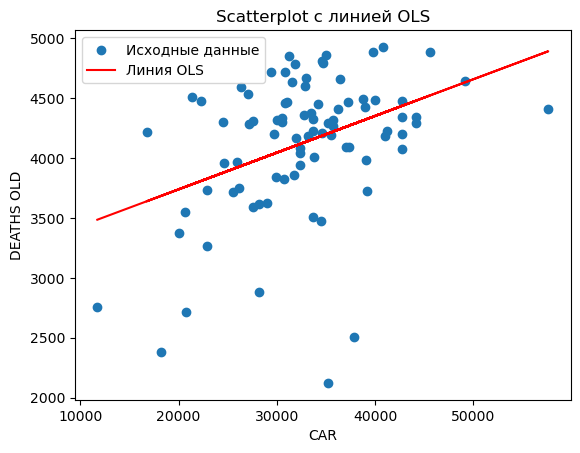

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:             DEATHS OLD   R-squared:                       0.158
Model:                            OLS   Adj. R-squared:                  0.148
Method:                 Least Squares   F-statistic:                     15.57
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           0.000165
Time:                        22:42:00   Log-Likelihood:                -653.11
No. Observations:                  85   AIC:                             1310.
Df Residuals:                      83   BIC:                             1315.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       3125.3302    260.376     12.003      0.000    2607.453    3643.207
CAR            0.0306      0.008      3.946      0.000       0.015       0.046
==============================================================================
Omnibus:                       29.735   Durbin-Watson:                   1.351
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               55.567
Skew:                          -1.340   Prob(JB):                     8.59e-13
Kurtosis:                       5.917   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [75]:
name = 'CAR'
name2 = 'DEATHS OLD'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

In [76]:
X = df[['AIR POL 2022',  'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
# Добавление константы (intercept) к независимым переменным
X = sm.add_constant(X)
# Определение зависимой переменной
y = df['MIGRATION']

# Построение модели
model = sm.OLS(y, X).fit()

# Вывод результатов
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MIGRATION   R-squared:                       0.376
Model:                            OLS   Adj. R-squared:                  0.310
Method:                 Least Squares   F-statistic:                     5.717
Date:                Mon, 03 Jun 2024   Prob (F-statistic):           1.08e-05
Time:                        22:42:00   Log-Likelihood:                -625.32
No. Observations:                  85   AIC:                             1269.
Df Residuals:                      76   BIC:                             1291.
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
const              -1845.5367    445.982     -4.138      0.000   -2733.786    -957.287
AIR POL 2022          35.3680    319.657      0.111      0.912    -601.284     672.020
WATER POL            746.7386    556.451      1.342      0.184    -361.529    1855.006
DUMP                 -31.8791    119.526     -0.267      0.790    -269.935     206.177
CAR                    0.0010      0.006      0.170      0.865      -0.011       0.013
AVERAGE INCOME         0.0017      0.003      0.622      0.536      -0.004       0.007
HEALTHY PERCENTAGE    -3.0681      8.996     -0.341      0.734     -20.985      14.849
PEOPLE PER BED        12.2335      2.313      5.290      0.000       7.627      16.840
DENSITY                0.0845      0.071      1.194      0.236      -0.056       0.225
==============================================================================
Omnibus:                       55.685   Durbin-Watson:                   1.718
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              314.536
Skew:                           1.932   Prob(JB):                     5.00e-69
Kurtosis:                      11.595   Cond. No.                     7.62e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.62e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [77]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

#perform Bresuch-Pagan test
names = ['Lagrange multiplier statistic', 'p-value',
 'f-value', 'f p-value']
test = sms.het_breuschpagan(model.resid, model.model.exog)

lzip(names, test)

[('Lagrange multiplier statistic', 21.298359143553828),
 ('p-value', 0.00639570549584048),
 ('f-value', 3.176282575196594),
 ('f p-value', 0.003690755233384787)]

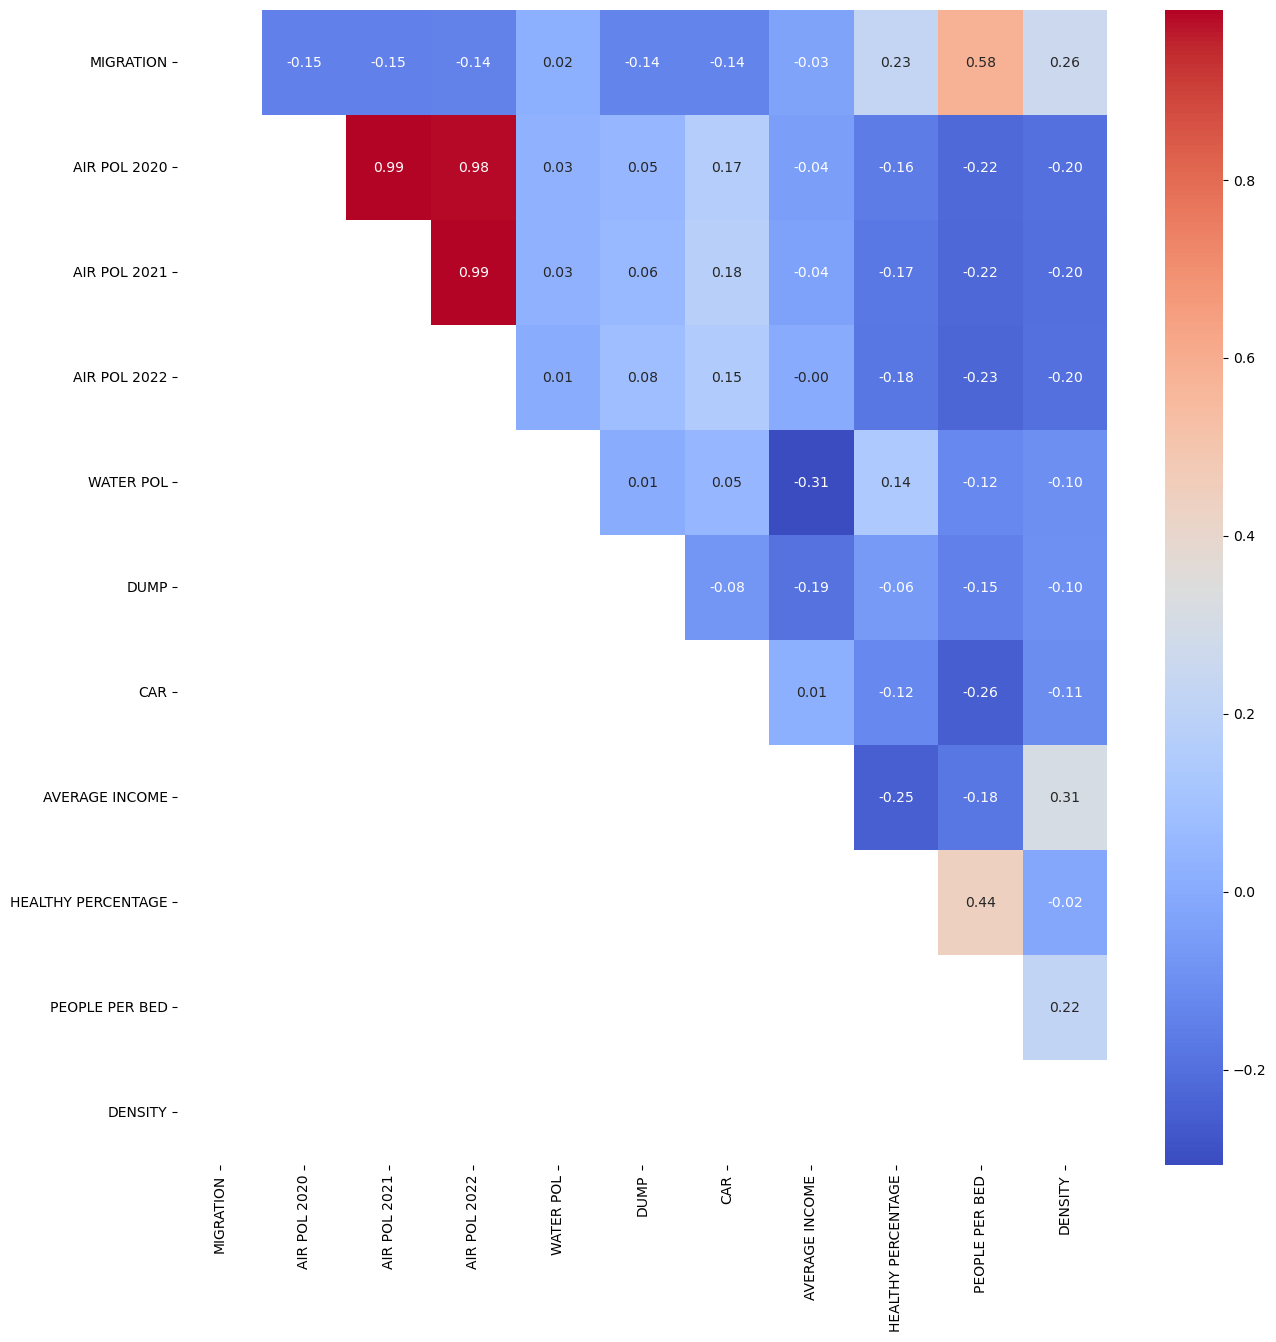

In [78]:
df8 = df[['MIGRATION','AIR POL 2020', 'AIR POL 2021', 'AIR POL 2022', 'WATER POL', 'DUMP', 'CAR', 'AVERAGE INCOME', 'HEALTHY PERCENTAGE', 'PEOPLE PER BED', 'DENSITY']]
fig, ax = plt.subplots(figsize=(15, 15))
corr = df8.corr()
mask = np.tril(np.ones_like(corr, dtype=bool))
sns.heatmap(corr, mask=mask, annot=True, cmap='coolwarm', fmt=".2f")
plt.show()

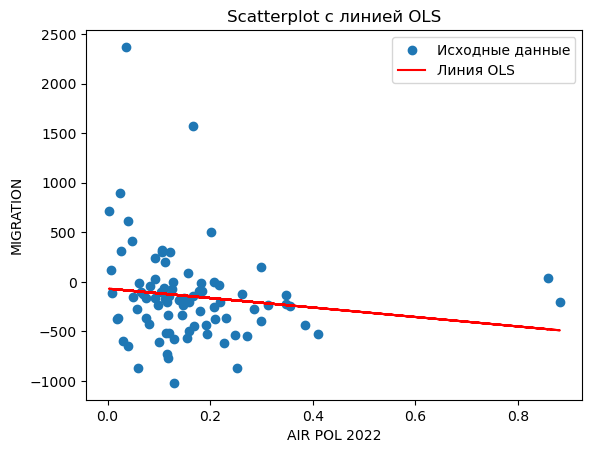

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MIGRATION   R-squared:                       0.020
Model:                            OLS   Adj. R-squared:                  0.008
Method:                 Least Squares   F-statistic:                     1.718
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.194
Time:                        22:42:01   Log-Likelihood:                -644.48
No. Observations:                  85   AIC:                             1293.
Df Residuals:                      83   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const          -68.1937     79.211     -0.861      0.392    -225.741      89.354
AIR POL 2022  -477.6076    364.392     -1.311      0.194   -1202.370     247.154
==============================================================================
Omnibus:                       59.175   Durbin-Watson:                   1.791
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              312.214
Skew:                           2.138   Prob(JB):                     1.60e-68
Kurtosis:                      11.359   Cond. No.                         7.18
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [79]:
name = 'AIR POL 2022'
name2 = 'MIGRATION'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

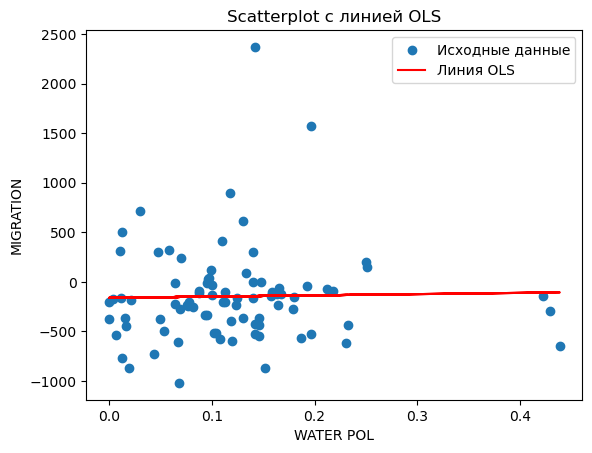

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MIGRATION   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.012
Method:                 Least Squares   F-statistic:                   0.04070
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.841
Time:                        22:42:01   Log-Likelihood:                -645.33
No. Observations:                  85   AIC:                             1295.
Df Residuals:                      83   BIC:                             1300.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -161.3381     91.001     -1.773      0.080    -342.335      19.659
WATER POL    124.5775    617.524      0.202      0.841   -1103.653    1352.808
==============================================================================
Omnibus:                       61.959   Durbin-Watson:                   1.759
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              342.648
Skew:                           2.249   Prob(JB):                     3.93e-75
Kurtosis:                      11.748   Cond. No.                         11.9
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [80]:
name = 'WATER POL'
name2 = 'MIGRATION'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

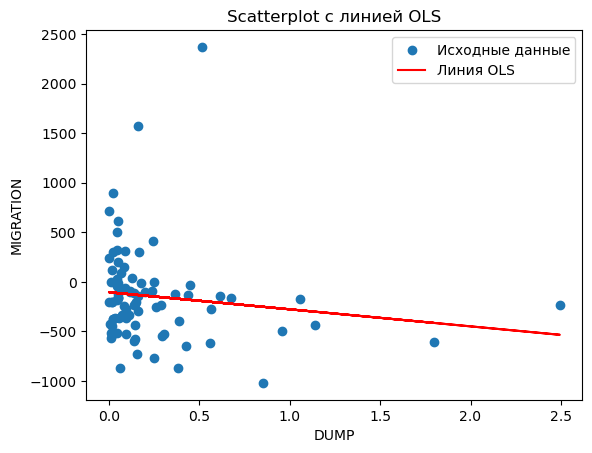

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MIGRATION   R-squared:                       0.019
Model:                            OLS   Adj. R-squared:                  0.007
Method:                 Least Squares   F-statistic:                     1.598
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.210
Time:                        22:42:01   Log-Likelihood:                -644.54
No. Observations:                  85   AIC:                             1293.
Df Residuals:                      83   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const       -105.2981     61.454     -1.713      0.090    -227.528      16.931
DUMP        -172.0271    136.085     -1.264      0.210    -442.695      98.640
==============================================================================
Omnibus:                       66.346   Durbin-Watson:                   1.817
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              419.974
Skew:                           2.391   Prob(JB):                     6.37e-92
Kurtosis:                      12.783   Cond. No.                         2.78
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [81]:
name = 'DUMP'
name2 = 'MIGRATION'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()

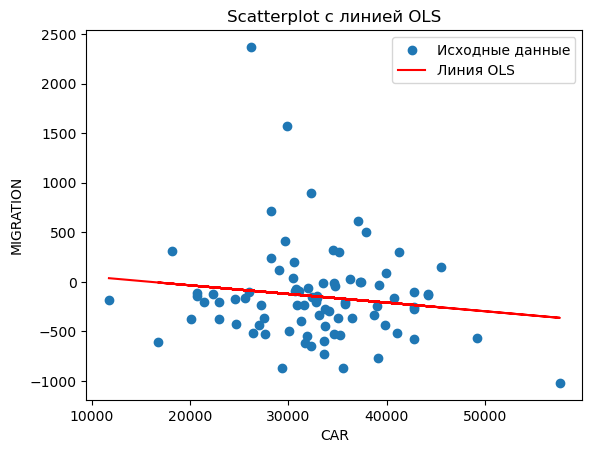

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:              MIGRATION   R-squared:                       0.018
Model:                            OLS   Adj. R-squared:                  0.006
Method:                 Least Squares   F-statistic:                     1.544
Date:                Mon, 03 Jun 2024   Prob (F-statistic):              0.218
Time:                        22:42:01   Log-Likelihood:                -644.56
No. Observations:                  85   AIC:                             1293.
Df Residuals:                      83   BIC:                             1298.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        138.9659    235.479      0.590      0.557    -329.392     607.324
CAR           -0.0087      0.007     -1.243      0.218      -0.023       0.005
==============================================================================
Omnibus:                       60.506   Durbin-Watson:                   1.737
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              311.262
Skew:                           2.219   Prob(JB):                     2.57e-68
Kurtosis:                      11.258   Cond. No.                     1.51e+05
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [82]:
name = 'CAR'
name2 = 'MIGRATION'
x = sm.add_constant(df1[name])

# Оцениваем модель OLS
model = sm.OLS(df[name2], x).fit()

# Получаем предсказанные значения
predicted_y = model.predict(x)

# Строим scatterplot и линию модели OLS
plt.scatter(df[name], df[name2], label='Исходные данные')
plt.plot(df[name], predicted_y, color='red', label='Линия OLS')
plt.xlabel(name)
plt.ylabel(name2)
plt.title('Scatterplot с линией OLS')
plt.legend()
plt.show()
model. summary ()